# Ungraded Lab: Introduction to Time Series Plots

This notebook aims to show different terminologies and attributes of a time series by generating and plotting synthetic data. Trying out different prediction models on this kind of data is a good way to develop your intuition when you get hands-on with real-world data later in the course. Let's begin!

## Imports

You will mainly be using [Numpy](https://numpy.org) and [Matplotlib's Pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) library to generate the data and plot the graphs.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Plot Utilities

You will be plotting several graphs in this notebook so it's good to have a utility function for that. The following code will visualize numpy arrays into a graph using Pyplot's [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. The x-axis will contain the time steps. The exact unit is not critical for this exercise so you can pretend it is either seconds, hours, year, etc. The y-axis will contain the measured values at each time step.

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## Trend

The *trend* describes the general tendency of the values to go up or down as time progresses. Given a certain time period, you can see if the graph is following an upward/positive trend, downward/negative trend, or just flat. For instance, the housing prices in a good location can see a general increase in valuation as time passes.

The simplest example to visualize is data that follows a straight line. You will use the function below to generate that. The `slope` argument will determine what the trend is. If you're coming from a mathematics background, you might recognize this as the [slope-intercept form](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form_or_Gradient-intercept_form) with the y-intercept being `0`.

In [ ]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

Here is a time series that trends upward. For a downward trend, simply replace the slope value below with a negative value (e.g. `-0.3`).

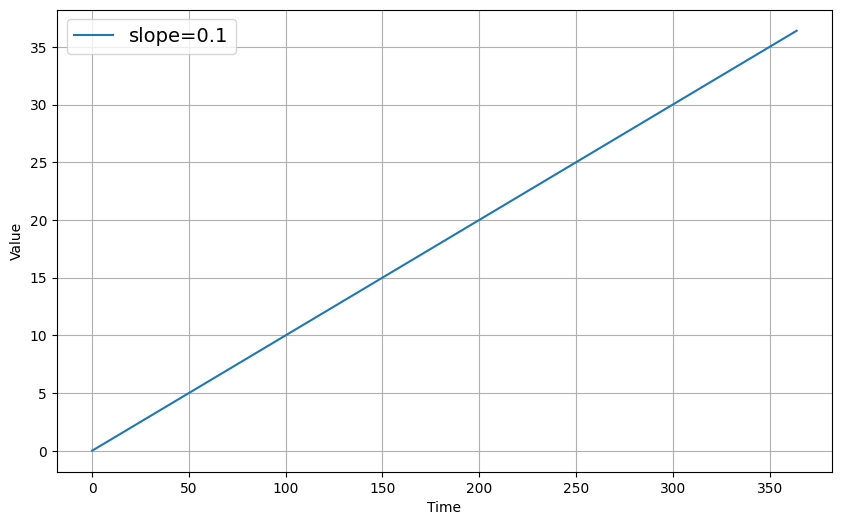

In [ ]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

As you can tell, you don't need machine learning to model this behavior. You can simply solve for the equation of the line and you have the perfect prediction model. Data like this is extremely rare in real world applications though and the trend line is simply used as a guide like the one shown in the [Moore's Law](https://en.wikipedia.org/wiki/Moore%27s_law) example in class.

## Seasonality

Another attribute you may want to look for is seasonality. This refers to a recurring pattern at regular time intervals. For instance, the hourly temperature might oscillate similarly for 10 consecutive days and you can use that to predict the behavior on the next day.

You can use the functions below to generate a time series with a seasonal pattern:

In [ ]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

The cell below shows the seasonality of the data generated because you can see the pattern every 365 time steps.

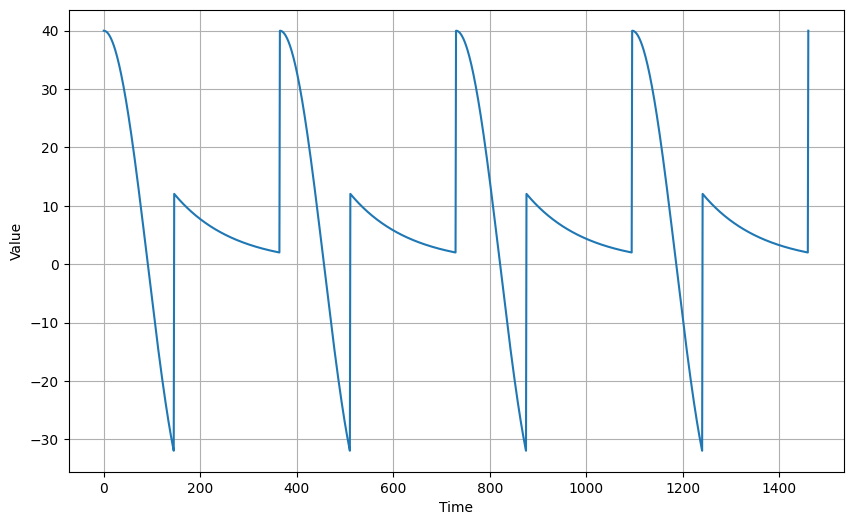

In [ ]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

A time series can also contain both trend and seasonality. For example, the hourly temperature might oscillate regularly in short time frames, but it might show an upward trend if you look at multi-year data.

The example below demonstrates a seasonal pattern with an upward trend:

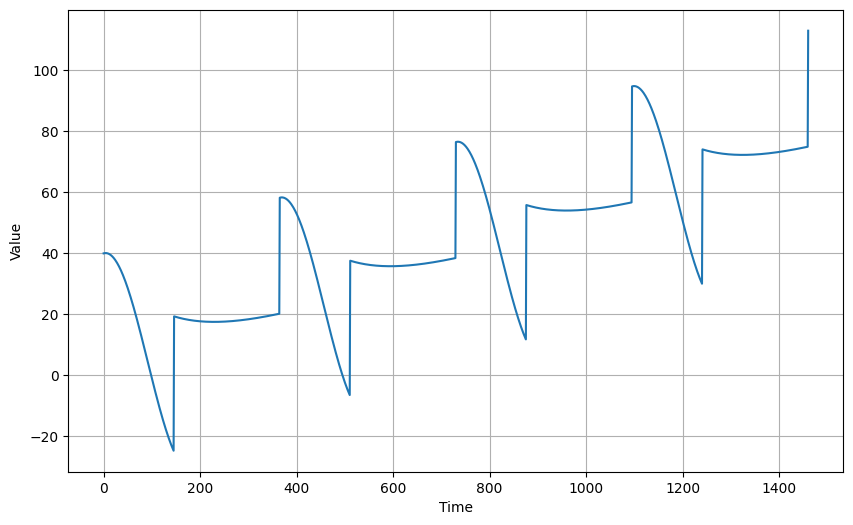

In [ ]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

Code pada def function tersebut yaitu 'seasonal_pattern(season_time)' dan 'seasonality(time, period, amplitude=1, phase=0)' untuk memodelkan data yang memiliki pola musiman atau data yang memiliki fluktuasi teratur dalam jangka waktu tertentu.

Fungsi 'seasonal_pattern' menerima array 'season_time' yang berisi pengukuran pada setiap langkah waktu, kemudian menghasilkan array 'data_pattern' yang berisikan nilai [engukuran yang direvisi dengan pola yang ditentukan. Polanya bersifat arbitrer dan dapat diubah kapanpun

dalam implementasinya, ' seasonal_time' menghasilkan nilai pengukuran dengan menggunakan pola tertentu, yaitu:

- jika nilai dalam 'season_time' kurang dari 0.4, maka nilai pengukuran dihitung menggunakan fungsi kosinus dengan frekuensi 2phi

- sebaliknya maka nilai pengukuran dihitung menggunakan fungsi eksponensial dengan pangkat -3

fungsi seasonality menghasilkan data yang memiliki pola musiman dengan menggunakan pola yang dihasilkan dari fungsi seasonal_pattern, fungsi ini menerima array time yang berisikan langkah waktu, period yang menentukan periode dalam langkah waktu sebelum pola mengulang, amplitude yang menentukan nilai puncak pengukuran dalam satu periode, dan phase yang menentukan pergeseran dalam langkah waktu dari pola musiman.

Dalam implementasinya, seasonality menghitung season_time sebagai sisa dari time + phase dibagi dengan period. Kemudian, data_pattern dihasilkan dengan mengalikan seasonal_pattern yang dihasilkan oleh seasonal_pattern dengan nilai amplitude.

Dalam keseluruhan, code ini berguna untuk memodelkan data yang memiliki fluktuasi dalam jangka waktu tertentu, seperti data musiman seperti data cuaca, data penjualan, data finansial dan lain-lain.

## Noise

In practice, few real-life time series have such a smooth signal. They usually have some noise riding over that signal. The next cells will show what a noisy signal looks like:

In [ ]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise


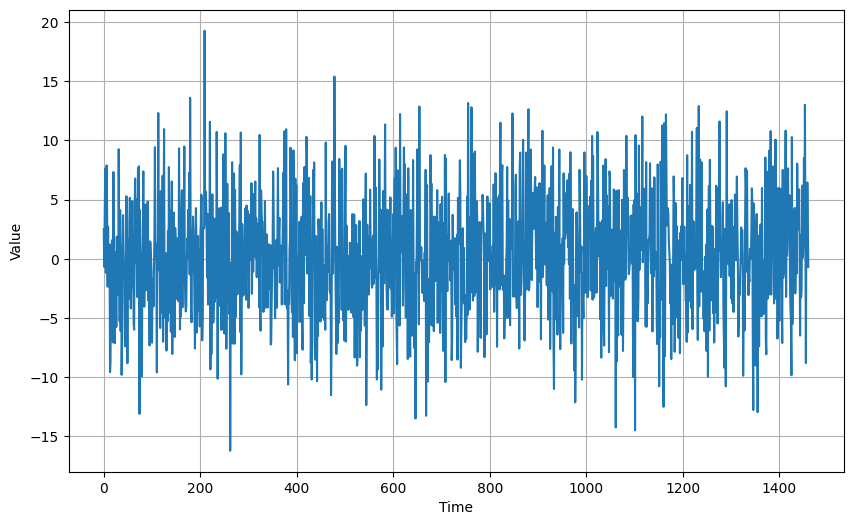

In [ ]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

Now let's add this to the time series we generated earlier:

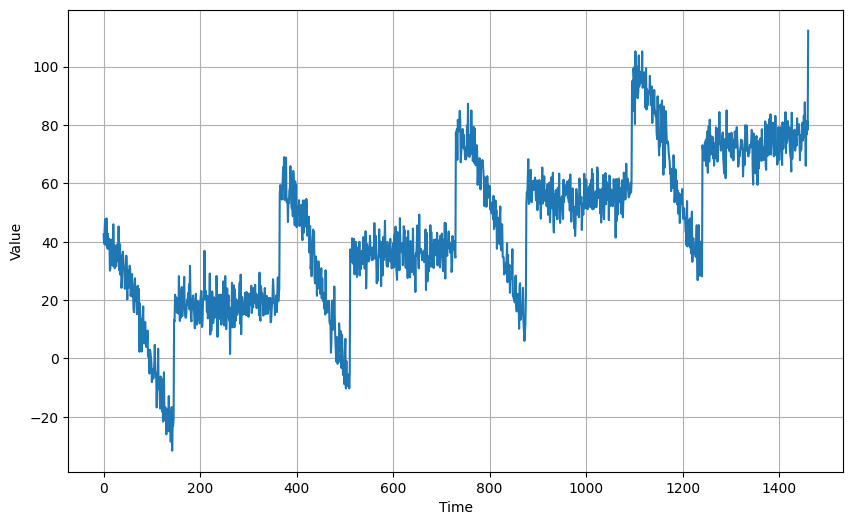

In [ ]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

As you can see, the series is still trending upward and seasonal but there is more variation between time steps because of the added noise.

Code tersebut adalah implementasi dari fungsi noise(time, noise_level=1, seed=None) yang menghasilkan sinyal berderau (noisy signal) dengan distribusi normal. Fungsi ini berguna untuk menambahkan variasi acak pada data atau sinyal, sehingga memperkaya analisis data.

Fungsi noise menerima array time yang berisi langkah waktu, noise_level yang menentukan faktor skalasi untuk sinyal yang dihasilkan, dan seed yang merupakan nomor generator acak untuk keulangan hasil yang sama.

Dalam implementasinya, fungsi ini menghasilkan sinyal berderau dengan menggunakan distribusi normal melalui np.random.randn(). np.random.RandomState(seed) digunakan untuk menginisialisasi generator nomor acak dengan seed yang diberikan. Kemudian, generator acak tersebut digunakan untuk menghasilkan nilai acak dengan distribusi normal sebanyak len(time) kali, yang kemudian akan dikalikan dengan noise_level.

Fungsi ini mengembalikan array noise yang berisi nilai sinyal berderau yang dihasilkan. Dalam keseluruhan, code ini berguna untuk menambahkan variasi acak pada data atau sinyal, yang kemudian dapat digunakan untuk analisis atau simulasi.

## Autocorrelation

Time series can also be autocorrelated. This means that measurements at a given time step is a function of previous time steps. Here are some functions that demonstrate that. Notice lines that refer to the `step` variable because this is where the computation from previous time steps happen. It will also include noise (i.e. random numbers) to make the result a bit more realistic.

In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)

    # Set first 50 elements to a constant
    ar[:50] = 100

    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]

    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

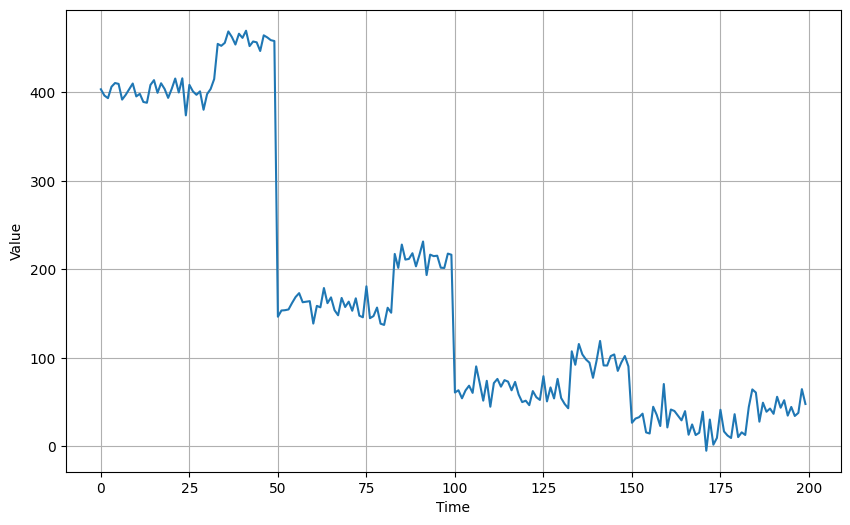

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

Here is a more straightforward autocorrelation function which just computes a value from the previous time step.

In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]

    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude

    return ar

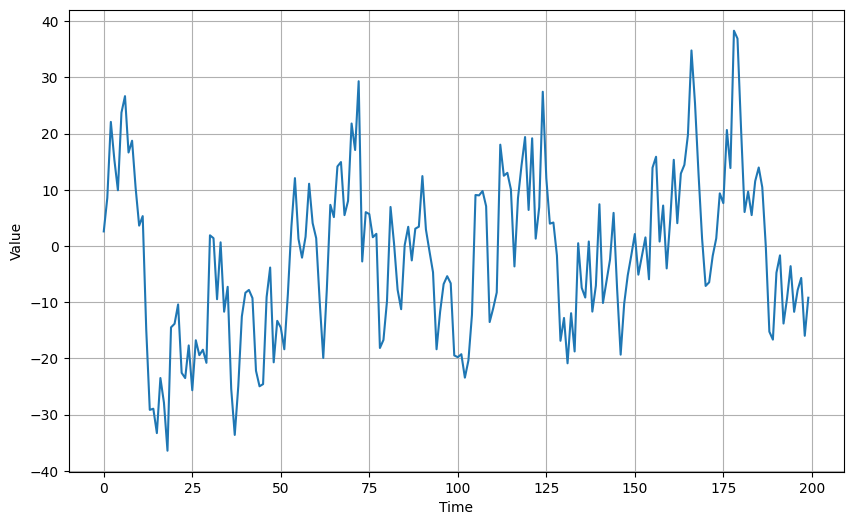

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Code ini adalah implementasi dari fungsi autocorrelation(time, amplitude, seed=None) yang menghasilkan data yang memiliki korelasi otonom (autocorrelated data).

Fungsi autocorrelation menerima array time yang berisi langkah waktu, amplitude yang menentukan faktor skalasi untuk data yang dihasilkan, dan seed yang merupakan nomor generator acak untuk keulangan hasil yang sama.

Dalam implementasinya, fungsi ini menghasilkan data yang memiliki korelasi otonom dengan menggunakan nilai acak dari distribusi normal. np.random.RandomState(seed) digunakan untuk menginisialisasi generator nomor acak dengan seed yang diberikan. Kemudian, generator acak tersebut digunakan untuk menghasilkan nilai acak dengan distribusi normal sebanyak len(time) + 1 kali dan disimpan pada array ar.

Dalam proses pengolahan data, elemen array ar dengan indeks 11 hingga akhir diberi korelasi otonom dengan elemen pada indeks sebelumnya (indeks step-1) dengan faktor skala phi (dalam code tersebut diatur sebagai 0.8). Hasilnya kemudian dikalikan dengan amplitude.

Fungsi ini mengembalikan array ar yang berisi data dengan korelasi otonom yang dihasilkan. Fungsi ini berguna untuk menghasilkan data dengan sifat korelasi yang mirip dengan data yang diperoleh dari pengukuran fisik atau proses alami.

Another autocorrelated time series you might encounter is one where it decays predictably after random spikes. You will first define the function that generates these spikes below.

In [ ]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series

You will use the function above to generate a series with 10 random impulses.

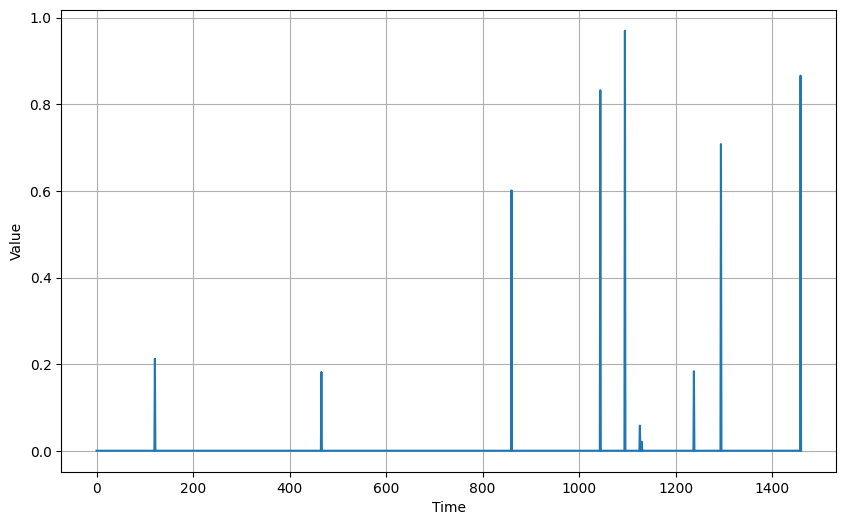

In [ ]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

Fungsi impulses() digunakan untuk menghasilkan serangkaian impuls acak. Berikut adalah penjelasan dari masing-masing argumen dan output:

time: array of int, menyimpan urutan waktu pada setiap langkah waktu
num_impulses: int, menentukan jumlah impuls yang akan dihasilkan
amplitude: float, menentukan amplitudo impuls
seed: int, menentukan bilangan acak yang akan dihasilkan
Output dari fungsi ini adalah sebuah array of float, yang menyimpan serangkaian impuls acak dengan panjang yang sama dengan time.

Fungsi ini pertama-tama menginisialisasi generator bilangan acak menggunakan bilangan acak seed yang diberikan, kemudian menghasilkan sejumlah indeks acak dari array time menggunakan randint(). Kemudian, untuk setiap indeks acak yang dihasilkan, nilai pada indeks tersebut ditambah dengan nilai bilangan acak yang dihasilkan oleh rand(). Akhirnya, fungsi mengembalikan array of float yang menyimpan serangkaian impuls acak yang telah dihasilkan.

Now that you have the series, you will next define the function that will decay the next values after it spikes.

In [ ]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

You can then use the function to generate the decay after the spikes. Here is one example that generates the next value from the previous time step (i.e. `t-1`, where `t` is the current time step):

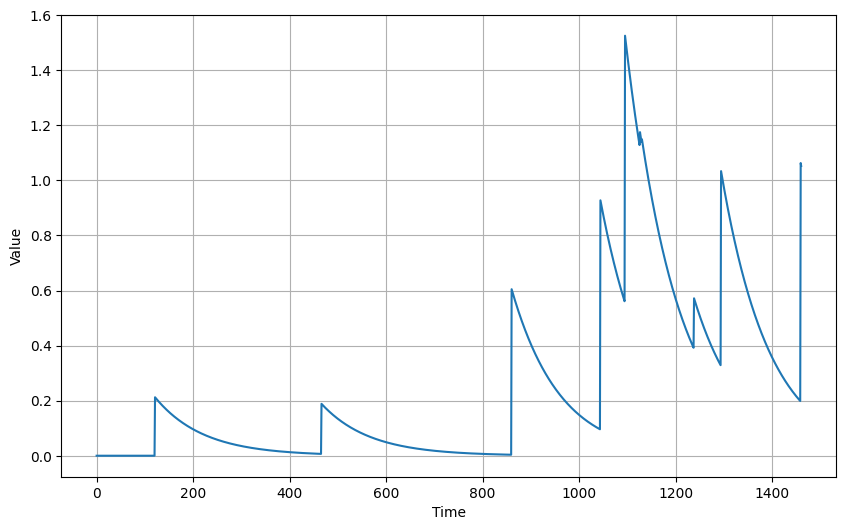

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

Here is another example where the next values are computed from those in `t-1` and `t-50`:

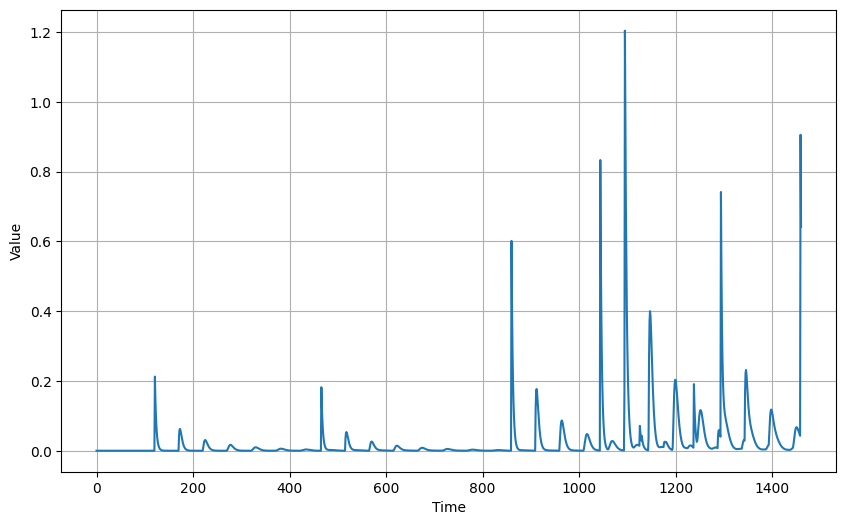

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line and it will look like below.

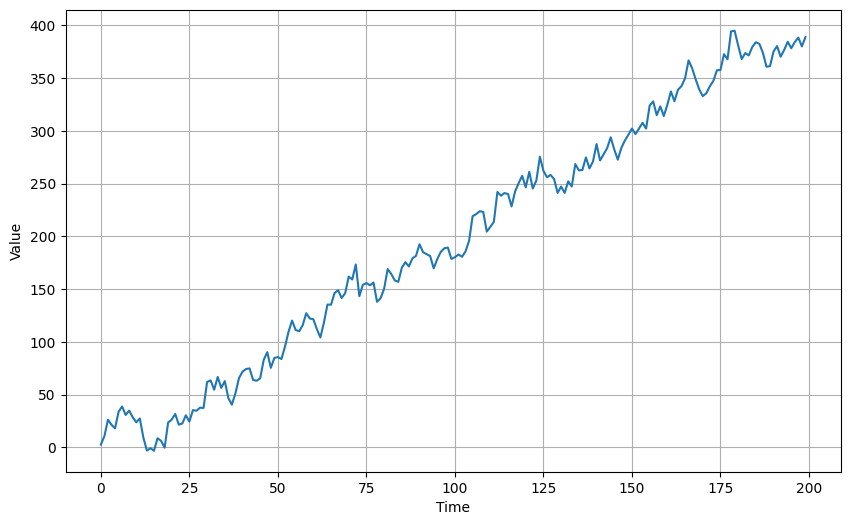

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

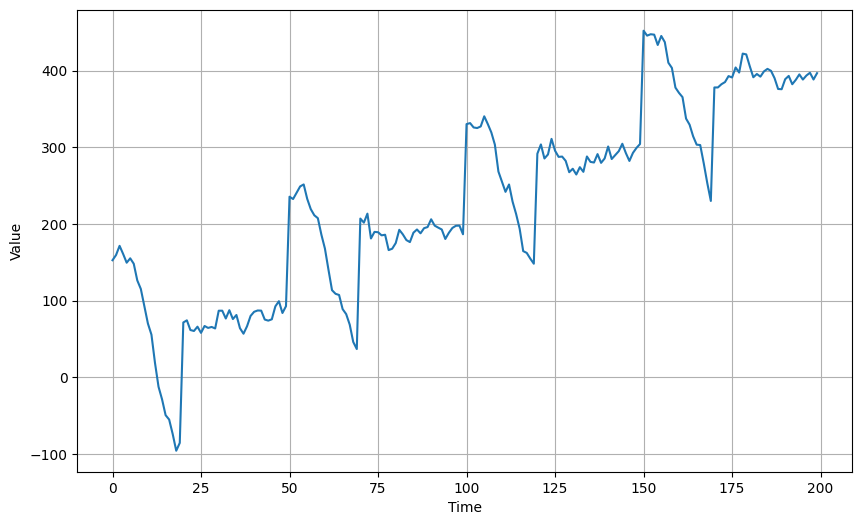

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])


## Non-stationary Time Series

It is also possible for the time series to break an expected pattern. As mentioned in the lectures, big events can alter the trend or seasonal behavior of the data. It would look something like below where the graph shifted to a downward trend at time step = 200.

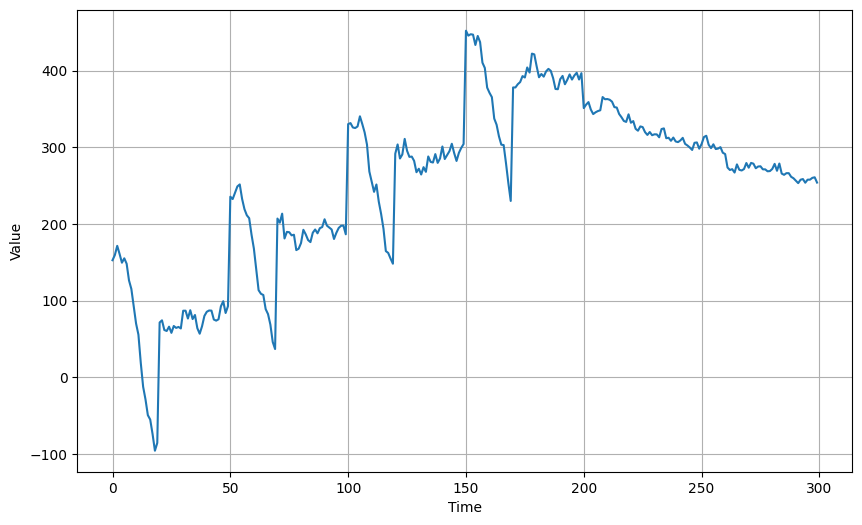

In [ ]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

In cases like this, you may want to train your model on the later steps (i.e. starting at t=200) since these present a stronger predictive signal to future time steps.

## Wrap Up

This concludes this introduction to time series terminologies and attributes. You also saw how to generate them and you will use these to test different forecasting techniques in the next sections. See you there!

# Ungraded Lab: Statistical Forecasting on Synthetic Data

In this lab, you will be doing some statistical forecasting so you can compare it with the machine learning models you will build later on.

## Imports

You will first import the packages you will need to execute all the code in this lab. You will use:
* [Tensorflow](https://www.tensorflow.org/api_docs/python/tf) to build your model and prepare data windows
* [Numpy](https://numpy.org/) for numerical processing
* and Matplotlib's [PyPlot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.html) library for visualization

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Utilities

You will then define some utility functions to make the code more organized. First up is the plotting function you also used in the previous lab.

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

You will also place the functions to generate your synthetic data here. For this lab, you will just need trend, seasonality, and noise. Feel free to add others later in case you want a more challenging task.

In [ ]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

## Generate the synthetic data

You can then use the utility functions above to generate the synthetic data. This will start at a baseline then trend upwards with a seasonal pattern every 365 steps. You will also add some noise because real world data is often noisy as well.

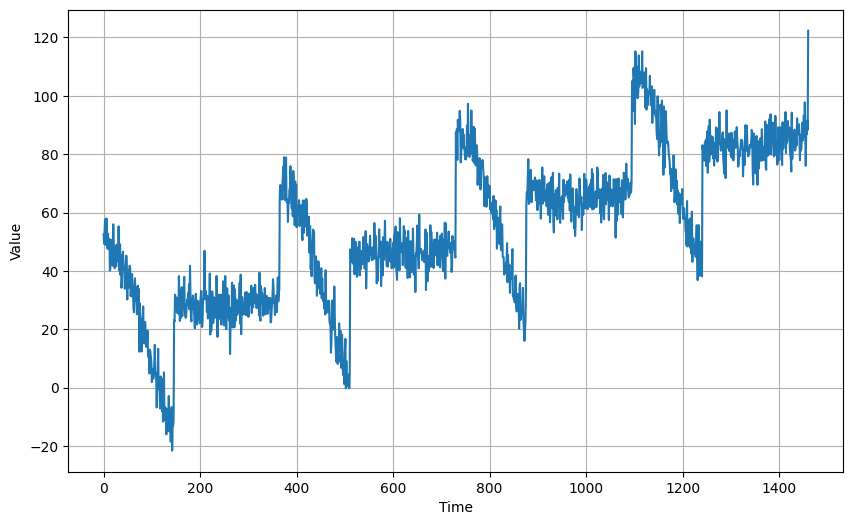

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

## Split the Dataset

Next up, you will split the data above into training and validation sets. You will take the first 1,000 points for training while the rest is for validation.

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

You can inspect these sets visually by using the same utility function for plotting. Notice that in general, the validation set has higher values (i.e. y-axis) than those in the training set. Your model should be able to predict those values just by learning from the trend and seasonality of the training set.

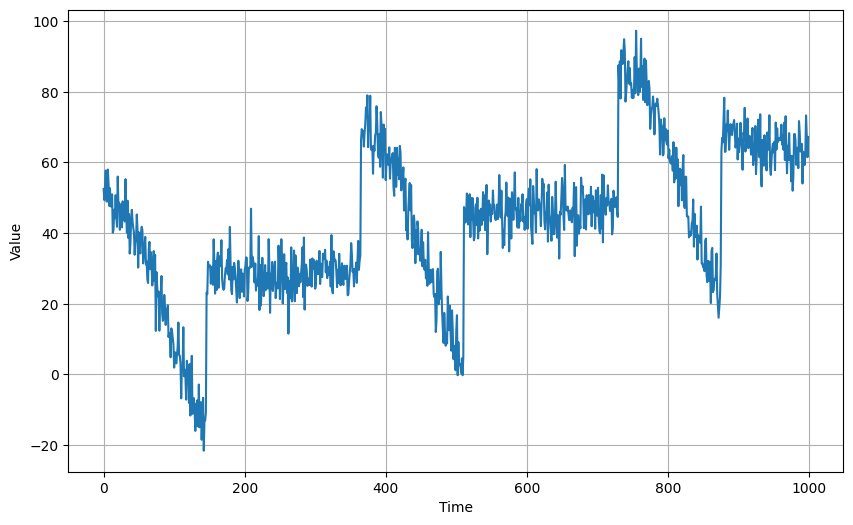

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

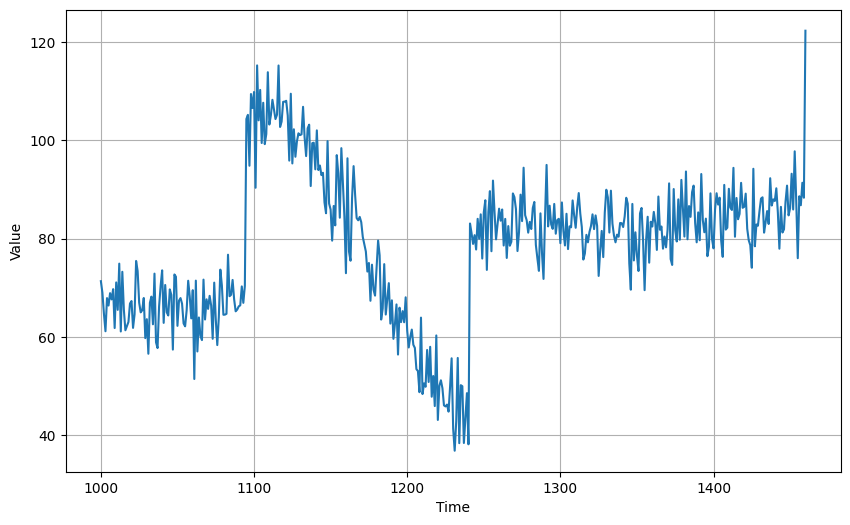

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

# Naive Forecast

As a baseline, you can do a naive forecast where you assume that the next value will be the same as the previous time step. You can slice the original series like below and print some values as a sanity check. The next time step value should be identical to the ground truth at the previous time step.

In [ ]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')


ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


You can see this visually with the `plot_series()` function you defined earlier.

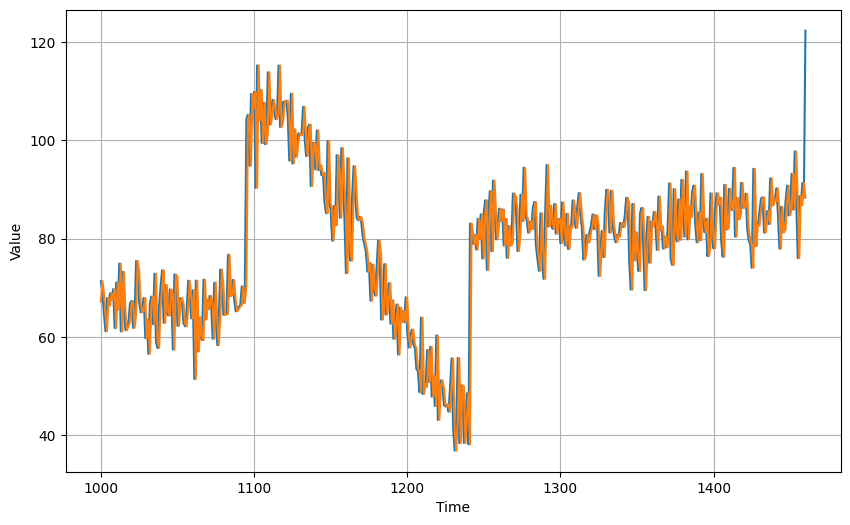

In [ ]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

You can zoom in at the start of the validation period to see that the naive forecast lags 1 step behind the time series.

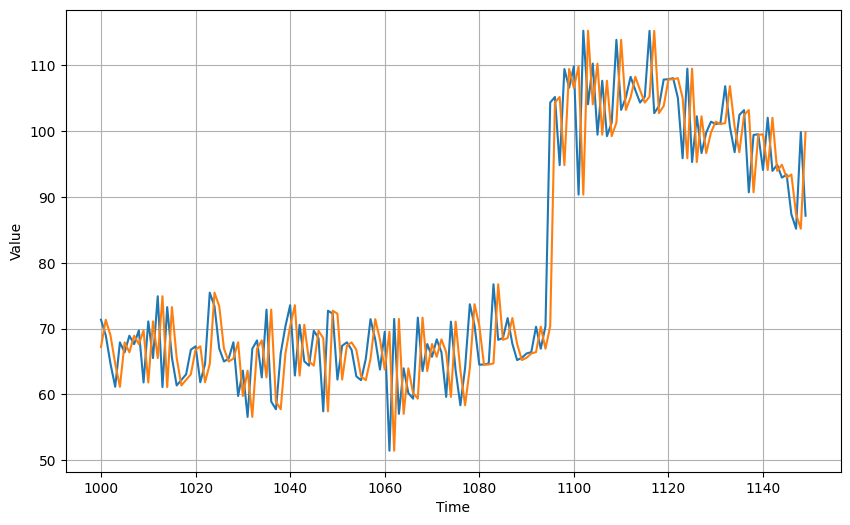

In [ ]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

### Computing Metrics

Now you will compute the [mean squared error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_squared_error) and the [mean absolute error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_error) between the forecasts and the predictions in the validation period. These are available via the [`tf.keras.metrics`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/) API.

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


The values above will be your baseline and you will see if you can use other methods to do better than naive forecasting.

## Moving Average

One technique you can use is to do a moving average. This sums up a series of time steps and the average will be the prediction for the next time step. For example, the average of the measurements at time steps 1 to 10 will be the forecast for time step 11, then the average for time steps 2 to 11 will be the forecast for time step 12, and so on.

The function below does the moving average for the entire `series`. It takes a `window_size` argument to indicate the number of time steps to consider when computing the mean.

In [ ]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

You will use this function to generate the forecast with a window size of `30`.

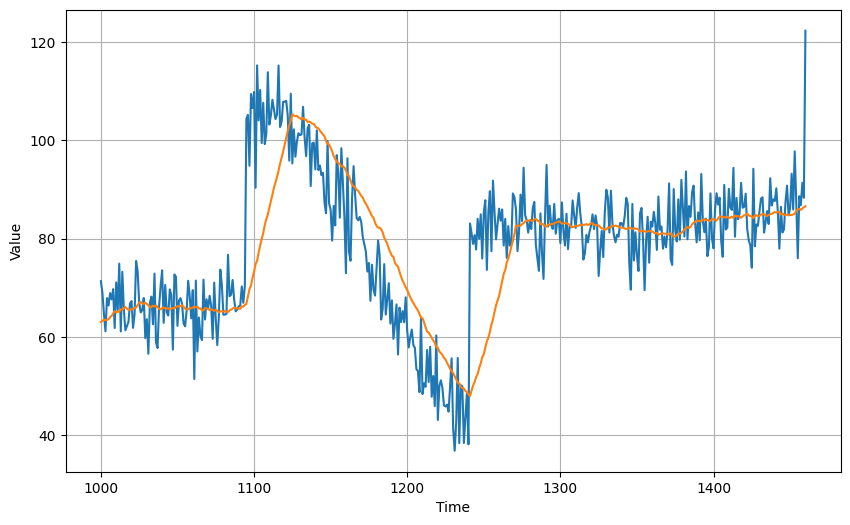

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above. You will try to remove these characteristics of the dataset with time differencing and see if you get better results.

## Differencing

Since the seasonality period is 365 days, you will subtract the value at time *t* – 365 from the value at time *t*. That is done with the code below.

In addition, you will need to align the result with the `time` array. Since you can only do time differencing for `t >= 365`, you will need to truncate the first 365 time steps of the `time` array.

You can plot the result to visualize the values.

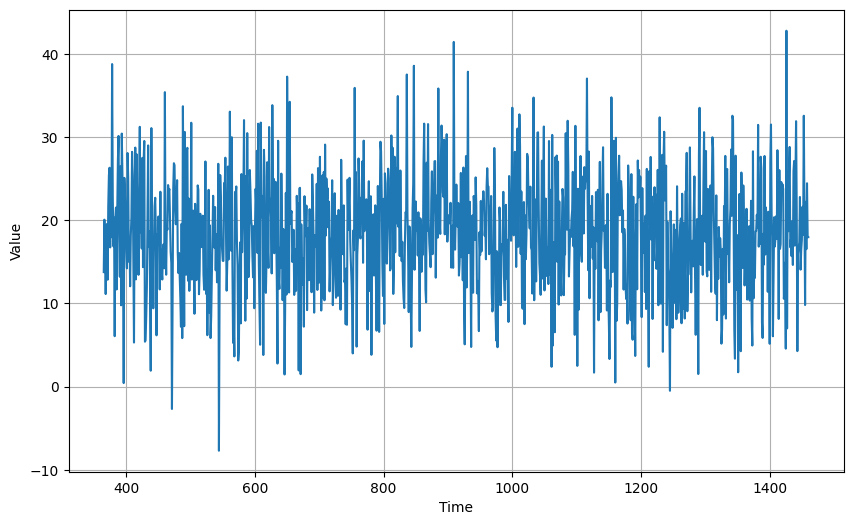

In [ ]:
# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

Great! The trend and seasonality seem to be gone so now you can retry using the moving average. `diff_series` is the ground truth while `diff_moving_avg` is the prediction array. You will slice these accordingly to correspond to the validation set time steps before comparing.

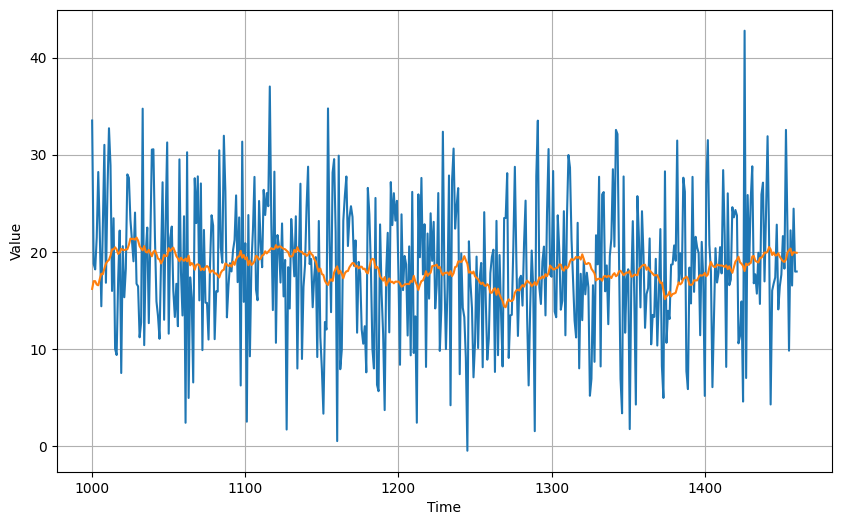

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

Now you will bring bring back the trend and seasonality by adding the past values from `t – 365`:

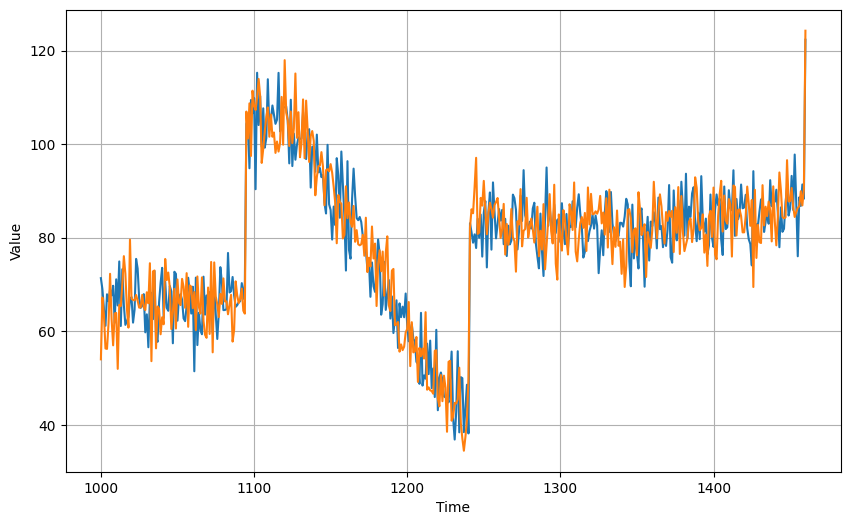

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

53.764587
5.9032416


It is a bit better than naive forecast. However, the forecasts look a bit too random because you're adding past values which are already noisy. Remember that the time differenced signal is also noisy so adding these raw past values can compound this problem. To remedy that, you can use a moving averaging on past values to smooth out some of this noise.

## Smoothing

You can use the same `moving_average_forecast()` function to smooth out past values before adding them back to the time differenced moving average. There are two ways to do this:

* Trailing windows - This refers to getting the mean of past values to smooth out the value at the current time step. For example, getting the average of `t=0` to `t=6` to get the smoothed data point at **`t=6`**.

* Centered windows - This refers to getting the mean of past *and future* values to smooth out the value at the current time step. For example, getting the average of `t=0` to `t=6` to get the smoothed data point at **`t=3`**.

The code below will use the centered windows approach and you will notice it in the slicing of the `series` array. It is shifted by `370` steps and the window size is `11`. To get the smooth data point at `t=1000` (i.e. start of the validation set), it will average the measurements at `t=995` to `t=1005`.

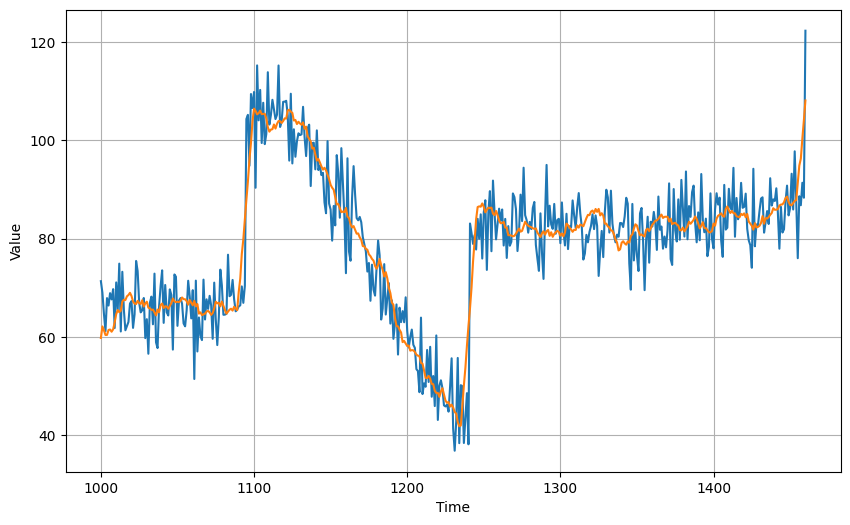

In [ ]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

The metrics will show a big improvement over the previous output.

In [ ]:
 # Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

34.315723
4.6053295


## Wrap Up

This concludes a short exploration of statistical methods for time series forecasting. In the next labs, you will build neural networks for forecasting and see if you get comparable results to the techniques you just used in this lab.

# Preparing Tome Series Features and Labels

In [ ]:
import tensorflow as tf

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)

dataset = tf.data.Dataset.range(10) # membuat data range menjadi Dataset

# Preview the result
for val in dataset:
  print(val.numpy())

0
1
2
3
4
5
6
7
8
9


# Windowing Data


In [ ]:
# Buat sebuah dataset dari tf dengan 10 elemen (yaitu angka 0 sampai 9)
dataset = tf.data.Dataset.range(10)

# window the data
dataset = dataset.window(size=5,shift=1) # fungsinya adalah membagi dataset menjadi 5 kolom

# Tampilkan hasil
for window_dataset in dataset:
  print(window_dataset)


<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [ ]:
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


# Flatten the windows

In [ ]:
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Jadi fungsi ini berguna untuk menjadikan dalam ukuran yang sama yaitu 5, sehingga panjang barisnya 5 (5+1)
dataset = dataset.flat_map(lambda window: window.batch(5))

# Print the results
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


# Group into features and labels

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Membagi dataset dengan mengambil kolom awal hingga sebelum akhir sbg x, dan kolom akhir sbg y
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

for x,y in dataset:
  print(f'x = {x.numpy()}, y = {y.numpy()}')


x = [0 1 2 3], y = 4
x = [1 2 3 4], y = 5
x = [2 3 4 5], y = 6
x = [3 4 5 6], y = 7
x = [4 5 6 7], y = 8
x = [5 6 7 8], y = 9


# Shuffle the Data

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Code ini digunakan untuk mengacak dataset, dimana argumen buffer_size digunakan untuk mengacak data dan better inisialisasinya >= window_number
dataset = dataset.shuffle(buffer_size=10)

for x,y in dataset:
  print(f'x = {x.numpy()}, y = {y.numpy()}')



x = [2 3 4 5], y = 6
x = [0 1 2 3], y = 4
x = [1 2 3 4], y = 5
x = [5 6 7 8], y = 9
x = [3 4 5 6], y = 7
x = [4 5 6 7], y = 8


# Create batches for training

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Code ini digunakan untuk mengacak dataset, dimana argumen buffer_size digunakan untuk mengacak data dan better inisialisasinya >= window_number
dataset = dataset.shuffle(buffer_size=10)

# Dataset dibagi menjadi dua kolom sesuai dengan nilai dari function batch, lalu prefetch digunakan untuk membuat model lebih optimal
dataset = dataset.batch(2).prefetch(1)

for x,y in dataset:
  print(f'x = {x.numpy()}, y = {y.numpy()}')

x = [[4 5 6 7]
 [2 3 4 5]], y = [8 6]
x = [[1 2 3 4]
 [5 6 7 8]], y = [5 9]
x = [[3 4 5 6]
 [0 1 2 3]], y = [7 4]


# Training a single layer neural network with time series data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Utilities
You will then define some utility functions that you also saw in the previous labs. These will take care of visualizing your time series data and model predictions, as well as generating the synthetic data.

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series


def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern


def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

# Generate the Synthetic Data

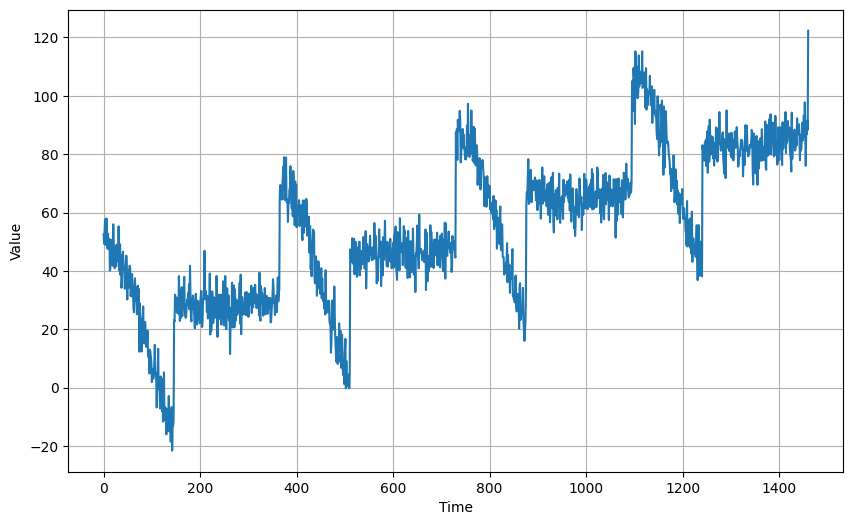

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

# Split the Dataset

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

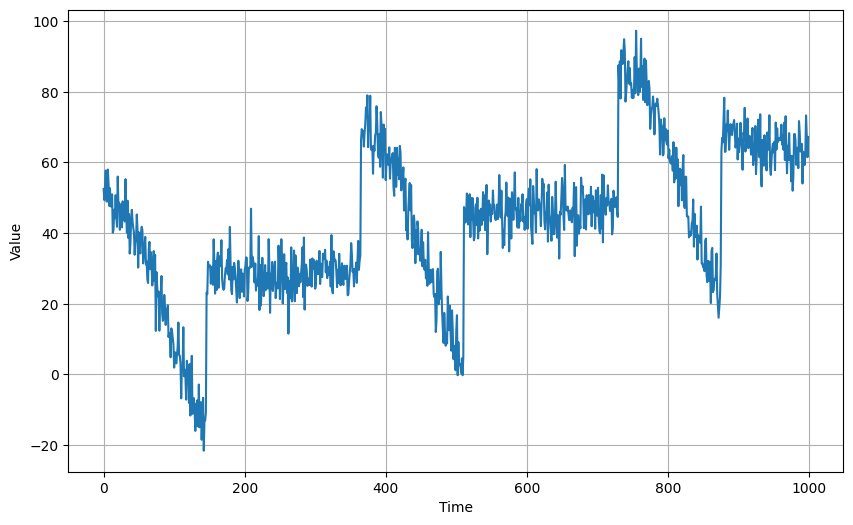

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

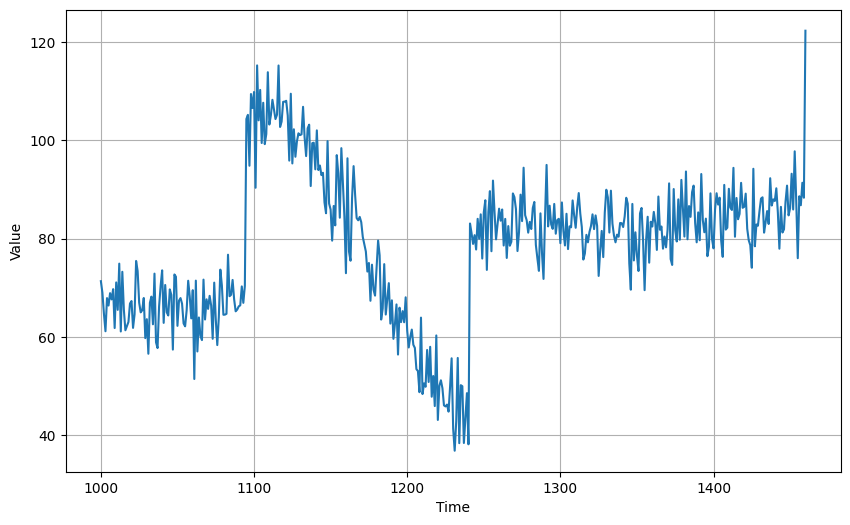

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

# Prepare features and labels
You will then prepare your data windows as shown in the previous lab. It is good to declare parameters in a separate cell so you can easily tweak it later if you want.

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

The following function contains all the preprocessing steps you did in the previous lab. This makes it modular so you can easily use it in your other projects if needed.

One thing to note here is the window_size + 1 when you call dataset.window(). There is a + 1 to indicate that you're taking the next point as the label. For example, the first 20 points will be the feature so the 21st point will be the label.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  # Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
  dataset = tf.data.Dataset.from_tensor_slices(series)

  # Window the data but only take those with the specified size
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True) # fungsinya adalah membagi dataset menjadi window_size+1 kolom

  # Flatten the windows by putting its elements in a single batch
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) # Jadi fungsi ini berguna untuk menjadikannya dalam ukuran yang sama yaitu window_size + 1, sehingga panjang barisnya window_size+1 (window_size+2)

  # Create tuples with features (first four elements of the window) and labels (last element)
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))

  # Code ini digunakan untuk mengacak dataset, dimana argumen buffer_size digunakan untuk mengacak data dan better inisialisasinya >= window_number
  dataset = dataset.shuffle(shuffle_buffer)

  # Dataset dibagi menjadi batch_size kolom sesuai dengan nilai dari function batch, lalu prefetch digunakan untuk membuat model lebih optimal
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)
for x in dataset:
  print(x.numpy())

52.48357
49.35275
53.314735
57.711823
48.934444
48.931244
57.982895
53.897125
47.67393
52.68371
47.591717
47.506374
50.959415
40.086178
40.919415
46.612473
44.228207
50.720642
44.454983
41.76799
55.980938
47.335835
48.6033
40.93184
45.11266
48.15732
41.6051
48.985233
43.839634
45.109936
43.275043
55.24983
45.615612
40.079105
49.154957
38.602703
45.406162
34.208767
37.00193
44.25351
46.578594
43.35101
41.514812
40.177532
33.871693
37.237713
38.097908
45.242546
41.222683
30.229015
40.196377
36.174564
34.231815
40.183838
41.78223
40.778324
31.413605
33.544636
36.221428
38.910835
31.098982
32.022236
26.868631
25.863333
35.345516
37.49725
29.783985
34.584698
30.793396
25.17319
29.614908
34.90301
26.434551
33.833897
12.305289
28.903387
24.615705
22.06895
23.403429
12.384742
20.599699
22.856821
27.831846
17.22026
15.136701
16.036467
22.487074
18.91756
13.98788
18.565226
15.84603
19.565367
10.573323
11.806878
10.846607
4.8520856
13.013545
12.202472
10.28818
8.456475
1.9209299
6.2647085
6.02649

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
for x,y in dataset:
  print(f'x={x}, y={y}')

x=[[ 32.98855     27.863678    22.15246     23.963987    30.93823
   23.888557    28.623238    27.769768    24.28527     38.26475
   30.716782    17.424019    28.484941    24.247059    31.82186
   23.60117     26.994549    30.098       31.90704     21.58235   ]
 [ 49.460827    45.461845    53.09068     41.916256    50.42897
   50.342705    45.857548    49.064213    41.20642     52.11075
   46.594894    44.934753    52.822556    44.08511     40.594
   39.88281     50.725815    41.3236      56.529865    37.37655   ]
 [ 34.145004    28.563086    25.200027    27.749893    31.45096
   26.59733     25.334665    30.694183    30.730724    27.001482
   27.211473    30.757544    22.38766     22.621704    26.097902
   28.654142    31.307323    37.161125    34.104355    29.048223  ]
 [ 68.069664    58.755577    74.25012     70.71561     62.1877
   55.672768    70.70246     63.04496     69.481316    54.984783
   59.61497     62.283337    62.12776     59.268875    64.25051
   55.40607     59.631157 

In [ ]:
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


# Kesimpulan
konsep pembagian datanya sama seperti pembagian data pada training dataset tebak lagu dimana data[:-1] menjadi features dan data[-1] menjadi lable

# Build and compile the model
Next, you will build the single layer neural network. This will just be a one-unit Dense layer as shown below. You will assign the layer to a variable l0 so you can also look at the final weights later using the get_weights() method

In [ ]:
l0 = tf.keras.layers.Dense(1, input_shape = [window_size])
model = tf.keras.models.Sequential([l0])

print(f'Layer weights :\n{l0.get_weights()}')

model.summary()

Layer weights :
[array([[-0.33532864],
       [ 0.39628977],
       [ 0.19449687],
       [ 0.34469205],
       [-0.28454453],
       [ 0.5019303 ],
       [ 0.23218983],
       [-0.26879716],
       [ 0.35068744],
       [-0.11075181],
       [-0.1591905 ],
       [ 0.15267181],
       [-0.14830866],
       [-0.5289583 ],
       [-0.2765265 ],
       [ 0.07085413],
       [ 0.0028888 ],
       [ 0.49821514],
       [ 0.40384233],
       [-0.36616075]], dtype=float32), array([0.], dtype=float32)]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
model.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 6s 19ms/step - loss: 1642.9222
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 205.5306
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 136.8481
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 123.8702
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 115.3663
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 109.1795
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 106.4508
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 99.2852
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 95.5142
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 91.2952
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 88.8072
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 85.6154
Epoch 13/100
31/

In [ ]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
1/1 [==============================] - 0s 96ms/step
model prediction: [[44.077724]]


In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  # print(time)
  # print(series[time:time + window_size][np.newaxis])
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

1/1 [==============================] - 0s 25ms/step
length of the forecast list: 461
shape of the validation set: (461,)


shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


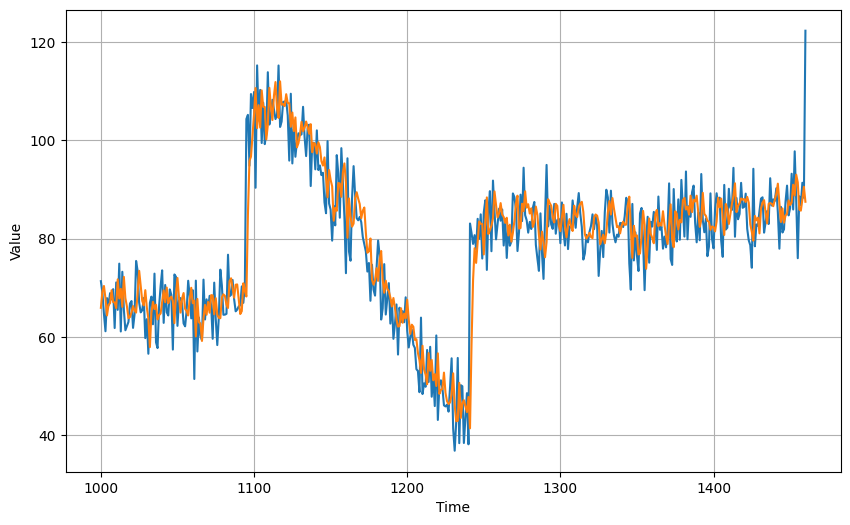

In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

# Training a Deep Neural Network with Time Series Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

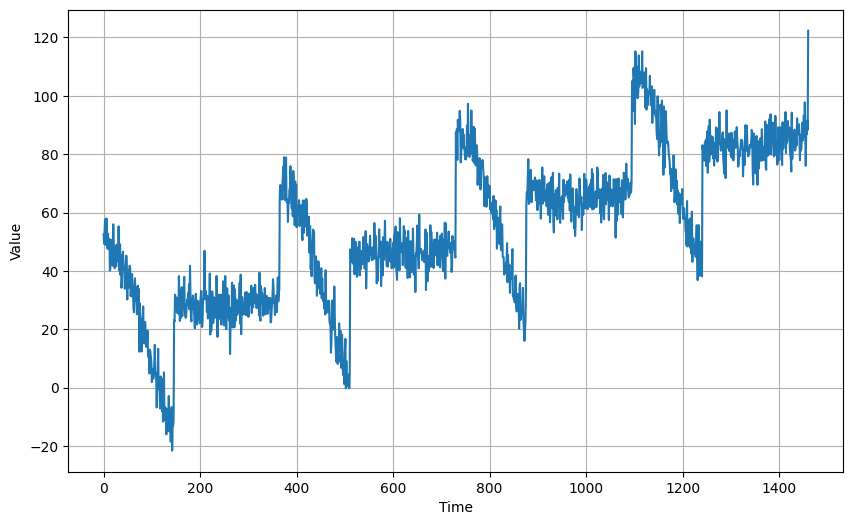

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to average
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Build the Model

In [ ]:

# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model_baseline.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 6s 14ms/step - loss: 442.8406
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 90.2048
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 79.0694
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 75.1702
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 72.6936
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 69.9435
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 67.8356
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 66.3928
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 64.7851
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 64.3359
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 62.1534
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 61.1588
Epoch 13/100
31/31 [===

1/1 [==============================] - 0s 19ms/step


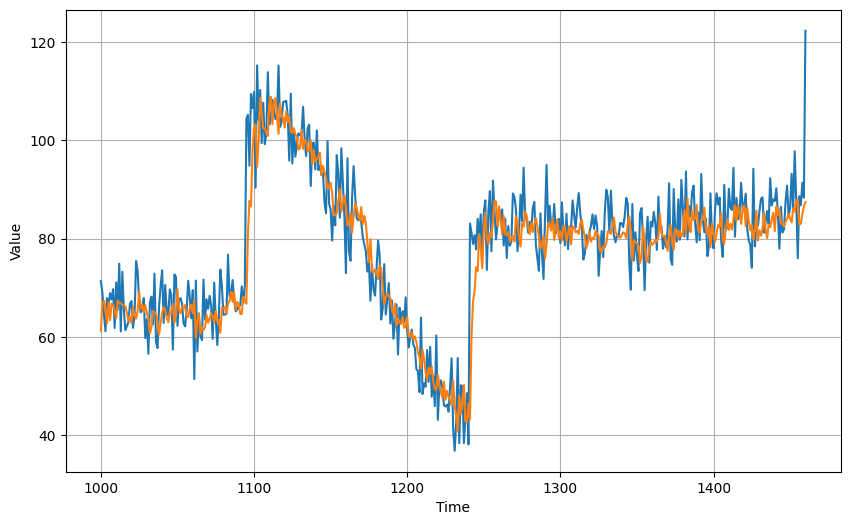

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

46.656986
5.00507


# Tune the learning Rate

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

Next, you will declare a learning rate scheduler callback. This will allow you to dynamically set the learning rate based on the epoch number during training. As shown below, you will pass a lambda function to declare the value of the learning rate. It will start at 1e-8 at epoch 0 and is scaled by 10**(epoch / 20) as the training goes on.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20)
)

In [ ]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [ ]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 5ms/step - loss: 541.9119 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 434.4432 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 331.0762 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 246.2471 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 184.1413 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 1s 6ms/step - loss: 142.8571 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 7ms/step - loss: 118.1275 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 7ms/step - loss: 105.0892 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 1s 7ms/step - loss: 98.8726 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 6ms/step - loss: 96.4429 - lr: 2.8184e-08
Epoch 11/10

(1e-08, 0.001, 0.0, 300.0)

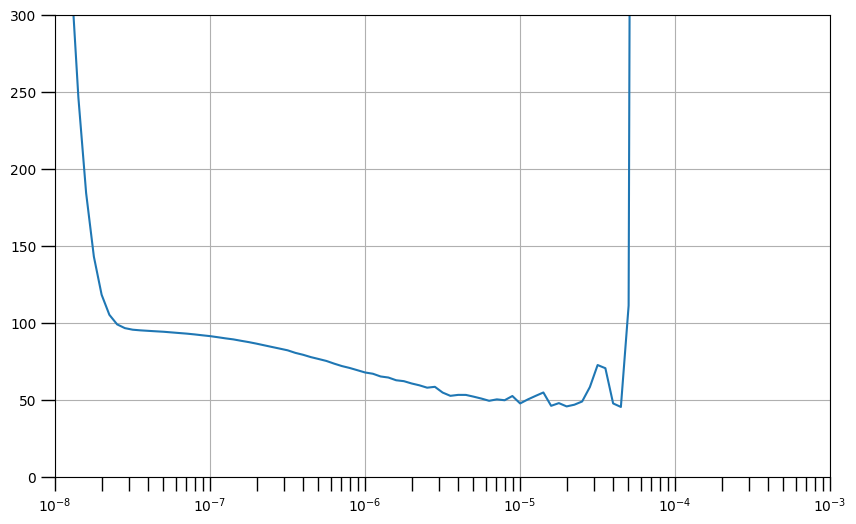

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

The generated graph above shows the values of the range of learning rates that leads to lower losses (i.e. sloping downward) and also which ones cause the training to become unstable (i.e. jagged edges and pointing upwards). In general, you will want to pick a point in a downward slope. That means the network is still learning at that point and is stable. Choosing close to the minimum point of the graph will make the training converge to that loss value quicker, as will be shown in the next cells.

First, you will initialize the same model architecture again.

In [ ]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [ ]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

In [ ]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 5ms/step - loss: 633.1150
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 98.8263
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 91.9726
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 80.4028
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 73.6240
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 68.5378
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 59.8095
Epoch 8/100
31/31 [==============================] - 1s 7ms/step - loss: 54.8716
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 52.5751
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 52.7564
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 51.1024
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 50.7058
Epoch 13/100
31/31 [====

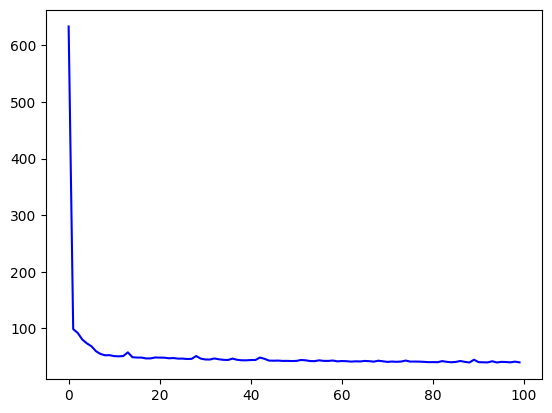

In [ ]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

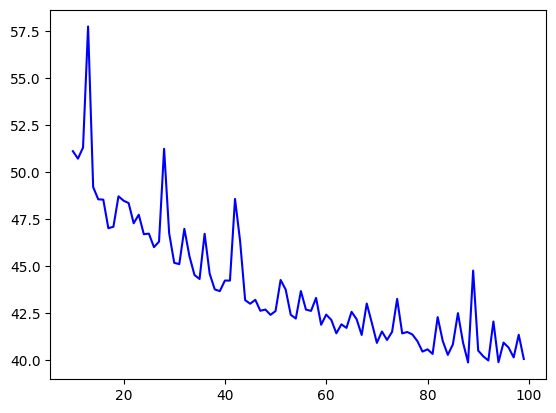

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

# Ungraded Lab: Using a Simple RNN for forecasting

In this lab, you will start to use recurrent neural networks (RNNs) to build a forecasting model. In particular, you will:

* build a stacked RNN using `simpleRNN` layers
* use `Lambda` layers to reshape the input and scale the output
* use the Huber loss during training
* use batched data windows to generate model predictions

You will train this on the same synthetic dataset from last week so the initial steps will be the same. Let's begin!

## Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Utilities

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

## Generate the Synthetic Data

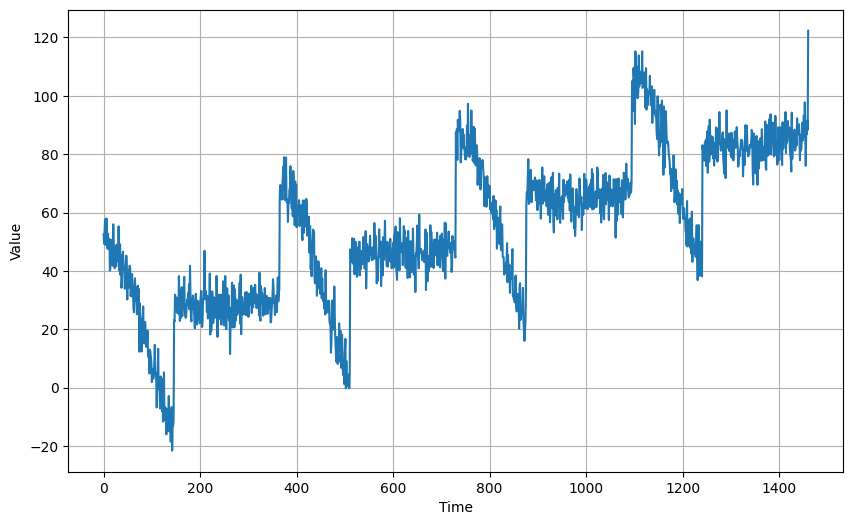

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

## Split the Dataset

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

## Prepare Features and Labels

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Print shapes of feature and label
for window in dataset.take(1):
  print(f'shape of feature: {window[0].shape}')
  print(f'shape of label: {window[1].shape}')

shape of feature: (32, 20)
shape of label: (32,)


## Build the Model

Your model is composed mainly of [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN) layers. As mentioned in the lectures, this type of RNN simply routs its output back to the input. You will stack two of these layers in your model so the first one should have `return_sequences` set to `True`.

As mentioned in the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN#call_arguments), `SimpleRNN` layers expect a 3-dimensional tensor input with the shape `[batch, timesteps, feature`]. With that, you need to reshape your window from `(32, 20)` to `(32, 20, 1)`. This means the 20 datapoints in the window will be mapped to 20 timesteps of the RNN. You can do this reshaping in a separate cell but you can also do this within the model itself by using [Lambda](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Lambda) layers. Notice the first layer below. It defines a lambda function that adds a dimension at the last axis of the input. That's exactly the transformation you need. For the `input_shape`, you can specify `None` (like in the lecture video) if you want the model to be more flexible with the number of timesteps. Alternatively, you can set it to `window_size` as shown below if you want to set the `timesteps` dimension to the expected size of your data windows.

Normally, you can just a have a `Dense` layer output as shown in the previous labs. However, you can help the training by scaling up the output to around the same figures as your labels. This will depend on the [activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) you used in your model. `SimpleRNN` uses *tanh* by default and that has an output range of `[-1,1]`. You will use another `Lambda()` layer to scale the output by 100 before it adjusts the layer weights. Feel free to remove this layer later after this lab and see what results you get.

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 20, 1)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


1. Mengapa ada layer yang namanya Lmbda? layer tersebut digunkana untuk memasukkan sebuah fungsi ke dalam model nerual network. Fungsi tersebut akan diterapkan pada setiap data input pada model. Pada contoh kode diatas, Lambda digunakna untuk mengubah dimensi data input
2. Mengapa argumen pertama dari layer Lmabda diisi dengan "lambda x: tf.expand_dims(x, axis=-1)" fungsi lambda tersebut digunakna untuk menambahkan dimensi baru pada data input. Pada kasusu ini, dimensi baru ditambahkan di posisi terakhir dengan menggunakan ufngsi 'tf.expand_dims(x, axis=-1)'. Hal ini dilakukan karena layer SimpleRNN pada TensorFlow membutuhkan input 3D, dengan dimensi '(batch_size, time_steps, input_dim)'
3. apa itu layer SimpleRNN? layer tersebut pada tensorflow adalah layer neural netwrok yang digunakan untuk melakukan pemrosesan pada data sequence atau time series. layer ini menggunakan output dari timestep sebelumnnya sebagai input untuk timestpe selanjutnya. Lalu kenapa argumen keduanya yaitu return_sequences=True? layer tersebut akan mengembalikan output sequence dengan dimensi yang sama dengan input sequence. Hal ini diperlukan jika output dari layer SimpleRNN akan digunakan sebagai input pada layer neural network berikutnya
4. lalu mengapa layer terakhirnya harus ditambahkan lagi layer lambda dengan argumennya diisi "lambda x: x*100.0"? Layer terakhir pada contoh kode diatas digunakan untuk mengubah output dari model menjadi skala yang lebih besar (dalam hal ini menjadi 100x lipat) hal ini dapat meningkatkan performa model dengan melakukan forecasting pada time series yang memiliki nilai yang jauh lebih besar dari 1.

## Tune the Learning Rate

You will then tune the learning rate as before. You will define a learning rate schedule that changes this hyperparameter dynamically. You will use the [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss) as your loss function to minimize sensitivity to outliers.

Pada contoh kode di atas, tf.keras.losses.Huber() digunakan sebagai loss function pada saat compiling model. Huber loss adalah salah satu jenis loss function yang sering digunakan pada model machine learning untuk regression task. Hal ini dikarenakan Huber loss memiliki beberapa keuntungan dibandingkan dengan loss function lainnya, seperti:

Robust terhadap outliers: Huber loss memiliki kemampuan untuk mengurangi pengaruh outlier terhadap nilai loss secara signifikan.

Continous: Dibandingkan dengan Mean Squared Error (MSE) yang biasanya digunakan pada regression task, Huber loss memberikan hasil yang lebih kontinu.

Parameter delta yang dapat diatur: Huber loss memiliki parameter delta yang dapat diatur untuk menentukan batas antara penggunaan Mean Absolute Error (MAE) dan Mean Squared Error (MSE). Hal ini dapat membantu meningkatkan performa model dengan menyesuaikan parameter delta sesuai dengan dataset yang digunakan.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 3s 20ms/step - loss: 112.5763 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 106.5739 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 99.4418 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 9ms/step - loss: 91.5853 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 82.8512 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 73.0551 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 61.9481 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 9ms/step - loss: 49.3415 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 36.6558 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 1s 14ms/step - loss: 28.6657 - lr: 2.8184e-08
Epoch 11/100
31

You can visualize the results and pick an optimal learning rate.

(1e-08, 0.001, 0.0, 50.0)

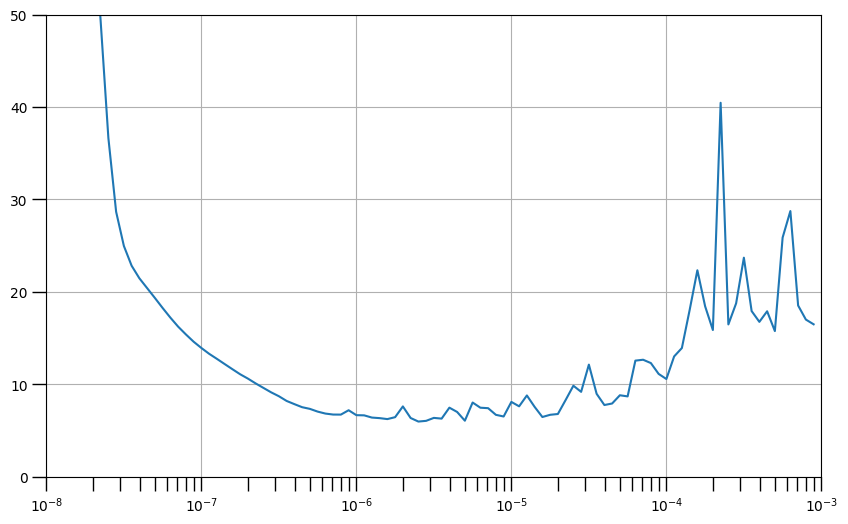

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

You can change the boundaries of the graph if you want to zoom in. The cell below chooses a narrower range so you can see more clearly where the graph becomes unstable.

(1e-07, 0.0001, 0.0, 20.0)

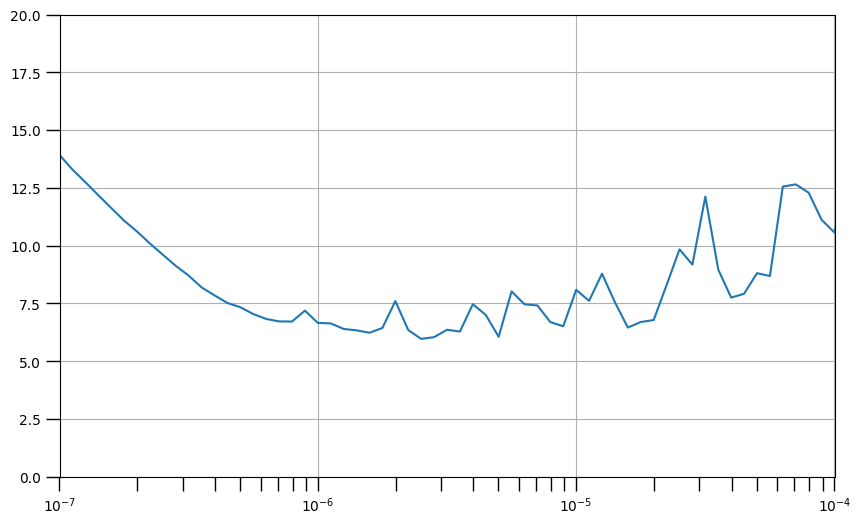

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-7, 1e-4, 0, 20])

## Train the Model

You can then declare the model again and train with the learning rate you picked. It is set to `1e-6`by default but feel free to change it.

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 1e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 2s 10ms/step - loss: 24.9071 - mae: 25.4038
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 13.4760 - mae: 13.9673
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 9.3908 - mae: 9.8775
Epoch 4/100
31/31 [==============================] - 0s 9ms/step - loss: 8.1390 - mae: 8.6214
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 7.7389 - mae: 8.2216
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 7.4112 - mae: 7.8940
Epoch 7/100
31/31 [==============================] - 0s 9ms/step - loss: 7.2736 - mae: 7.7530
Epoch 8/100
31/31 [==============================] - 0s 9ms/step - loss: 7.2271 - mae: 7.7103
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 7.0796 - mae: 7.5619
Epoch 10/100
31/31 [==============================] - 0s 9ms/step - loss: 6.9950 - mae: 7.4747
Epoch 11/100
31/31 [==============================] -

## Model Prediction

Now it's time to generate the model predictions for the validation set time range. The model is a lot bigger than the ones you used before and the sequential nature of RNNs (i.e. inputs go through a series of time steps as opposed to parallel processing) can make predictions a bit slow. You can observe this when using the code you ran in the previous lab. This will take about a minute to complete.

1/1 [==============================] - 0s 23ms/step


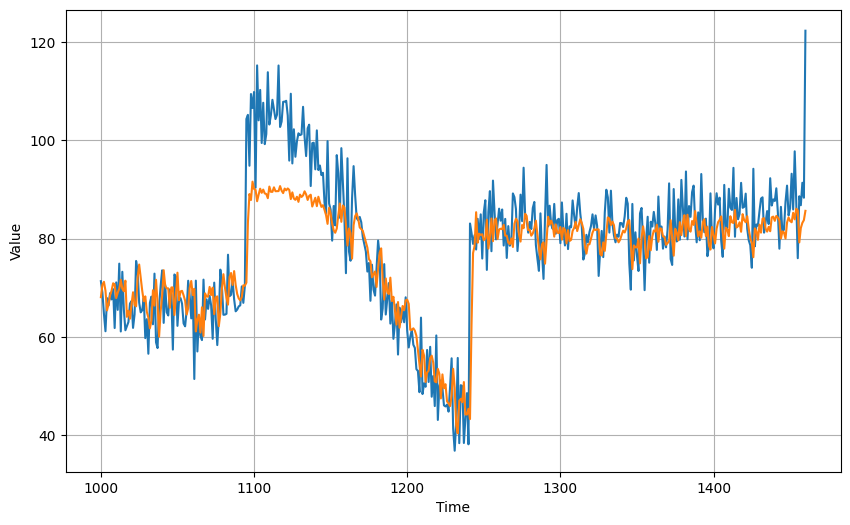

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

You can optimize this step by leveraging Tensorflow models' capability to process batches. Instead of running the for-loop above which processes a single window at a time, you can pass in an entire batch of windows and let the model process that in parallel.

The function below does just that. You will notice that it almost mirrors the `windowed_dataset()` function but it does not shuffle the windows. That's because we want the output to be in its proper sequence so we can compare it properly to the validation set.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

You can run the function below to use the function. Notice that the predictions are generated almost instantly.

*Note: You might notice that the first line slices the `series` at `split_time - window_size:-1` which is a bit different from the slower for-loop code. That is because we want the model to have its last prediction to align with the last point of the validation set (i.e. `t=1460`). You were able to do that with the slower for-loop code by specifying the for-loop's `range()`. With the more efficient function above, you don't have that mechanism so you instead just remove the last point when slicing the `series`. If you don't, then the function will generate a prediction at `t=1461` which is outside the validation set range.*

15/15 [==============================] - 0s 7ms/step


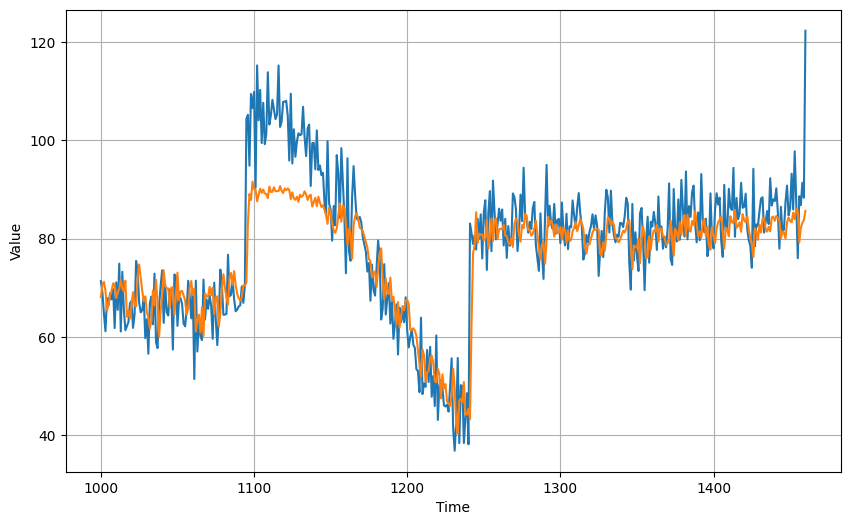

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

You can then compute the MSE and MAE. You can compare the results here when using other RNN architectures which you'll do in the next lab.

In [ ]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

66.52678
6.0045033


# Ungraded Lab: Using a multi-layer LSTM for forecasting

In this lab, you will use the same RNN architecure in the first lab but will instead stack [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) layers instead of `SimpleRNN`.

## Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Utilities

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

## Generate the Synthetic Data

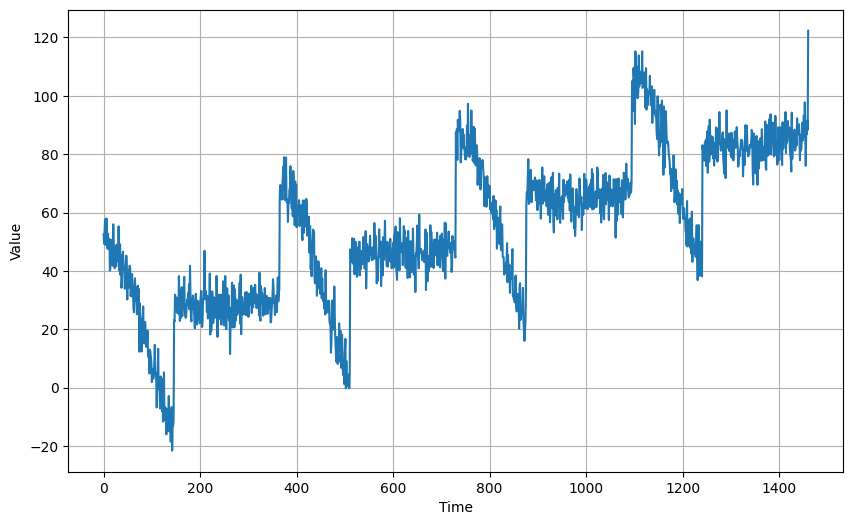

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

## Split the Dataset

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

## Prepare Features and Labels

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## Build the Model

As mentioned, you will swap `SimpleRNN` for `LSTM` in this lab. It is also set as bidirectional below but feel free to revise later and see what results you get. LSTMs are much more complex in their internal architecture than simpleRNNs. It implements a cell state that allows it to remember sequences better than simple implementations. This added complexity results in a bigger set of parameters to train and you'll see that when you print the model summary below.

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 20, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

## Tune the Learning Rate

As usual, you will pick a learning rate by running the tuning code below.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 11s 19ms/step - loss: 110.2031 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 103.2553 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 89.0895 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 71.3538 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 61.8561 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 56.6324 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 52.5031 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 10ms/step - loss: 48.6595 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 10ms/step - loss: 44.8245 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 9ms/step - loss: 40.8783 - lr: 2.8184e-08
Epoch 11

(1e-08, 0.001, 0.0, 30.0)

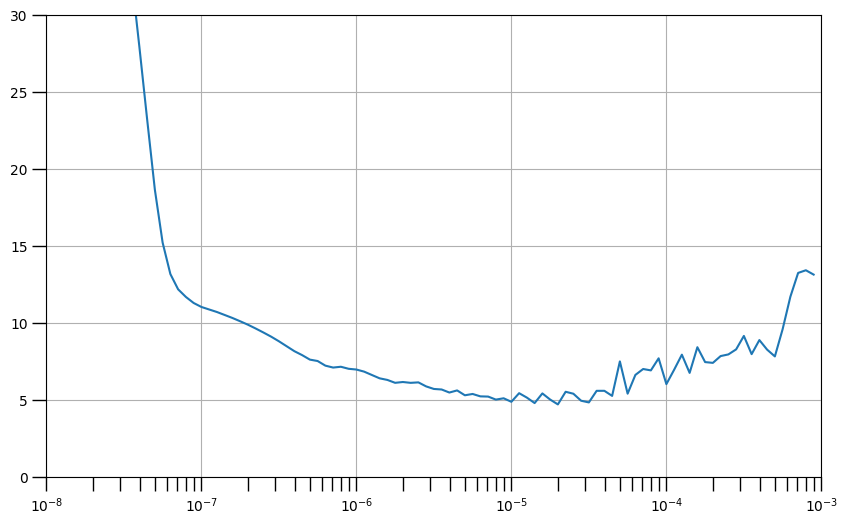

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 30])

## Train the Model

You can then proceed to train the model with your chosen learning rate.

*Tip: When experimenting and you find yourself running different iterations of a model, you may want to use the [`clear_session()`](https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session) method to declutter memory used by Keras. This is added in the first line below.*


In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-5

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 7s 10ms/step - loss: 10.4264 - mae: 10.9141
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 6.8239 - mae: 7.3082
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 5.7881 - mae: 6.2715
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 5.4669 - mae: 5.9461
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 5.8207 - mae: 6.2982
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 6.8131 - mae: 7.2982
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 5.7882 - mae: 6.2719
Epoch 8/100
31/31 [==============================] - 0s 10ms/step - loss: 5.9833 - mae: 6.4631
Epoch 9/100
31/31 [==============================] - 0s 10ms/step - loss: 6.3920 - mae: 6.8773
Epoch 10/100
31/31 [==============================] - 0s 9ms/step - loss: 5.1576 - mae: 5.6363
Epoch 11/100
31/31 [==============================

## Model Prediction

You will then generate batches of windows to generate predictions that align with the validation set.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

15/15 [==============================] - 1s 9ms/step


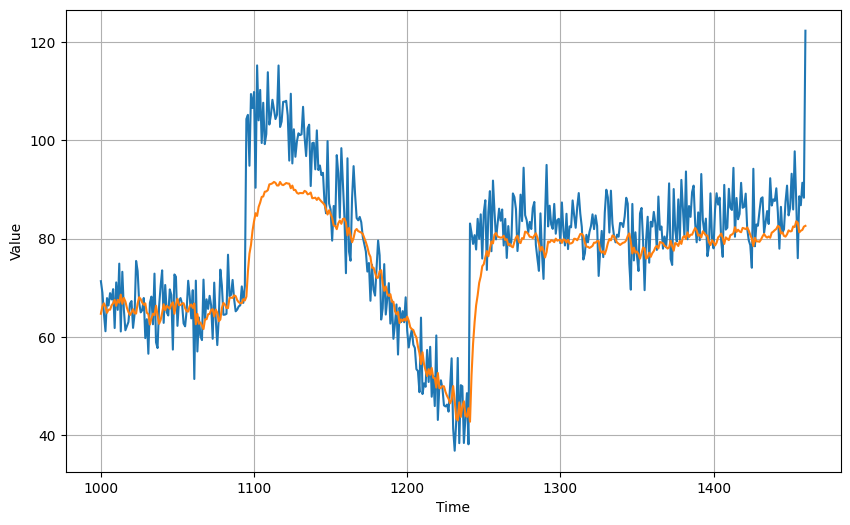

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

You can then generate the metrics to evaluate the model's performance.

In [ ]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

73.41077
6.2319565


## Wrap Up

This concludes this short exercise on using LSTMs for time series forecasting. Next week, you will build upon this and add convolutions. Then, you will start to move away from synthetic data and use real-world datasets. See you there!

## Optional: Including a Validation Set while Training

Back in the first course of this specialization, you saw how you can also monitor the performance of your model against a validation set while training. You can also do that for this lab.

First, you need to generate a `val_set` which are data windows and labels that your model can accept. You can simply reuse the `windowed_dataset` function for that and you can pass in the `x_valid` points to generate the windows.

In [ ]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

You can then do the same training as before but pass in the `val_set` to the `validation_data` parameter of the `fit()` method.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-5

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
31/31 [==============================] - 8s 89ms/step - loss: 14.9209 - mae: 15.4110 - val_loss: 15.6517 - val_mae: 16.1462
Epoch 2/100
31/31 [==============================] - 1s 14ms/step - loss: 8.8424 - mae: 9.3267 - val_loss: 9.2012 - val_mae: 9.6868
Epoch 3/100
31/31 [==============================] - 0s 13ms/step - loss: 7.7378 - mae: 8.2246 - val_loss: 10.1062 - val_mae: 10.5948
Epoch 4/100
31/31 [==============================] - 1s 14ms/step - loss: 6.6291 - mae: 7.1125 - val_loss: 7.3513 - val_mae: 7.8321
Epoch 5/100
31/31 [==============================] - 1s 14ms/step - loss: 5.7791 - mae: 6.2564 - val_loss: 7.5262 - val_mae: 8.0129
Epoch 6/100
31/31 [==============================] - 1s 14ms/step - loss: 5.6393 - mae: 6.1191 - val_loss: 6.6556 - val_mae: 7.1347
Epoch 7/100
31/31 [==============================] - 1s 14ms/step - loss: 5.1890 - mae: 5.6682 - val_loss: 8.4765 - val_mae: 8.9656
Epoch 8/100
31/31 [==============================] - 1s 13ms/step - lo

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-5

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics = [['accuracy','mae']])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
31/31 [==============================] - 8s 58ms/step - loss: 16.3556 - accuracy: 0.0000e+00 - mae: 16.8491 - val_loss: 16.4447 - val_accuracy: 0.0000e+00 - val_mae: 16.9402
Epoch 2/100
31/31 [==============================] - 1s 14ms/step - loss: 6.0265 - accuracy: 0.0000e+00 - mae: 6.5068 - val_loss: 10.1417 - val_accuracy: 0.0000e+00 - val_mae: 10.6294
Epoch 3/100
31/31 [==============================] - 1s 14ms/step - loss: 5.3682 - accuracy: 0.0000e+00 - mae: 5.8496 - val_loss: 7.5869 - val_accuracy: 0.0000e+00 - val_mae: 8.0719
Epoch 4/100
31/31 [==============================] - 1s 14ms/step - loss: 5.5212 - accuracy: 0.0000e+00 - mae: 6.0014 - val_loss: 6.8747 - val_accuracy: 0.0000e+00 - val_mae: 7.3583
Epoch 5/100
31/31 [==============================] - 1s 14ms/step - loss: 5.3781 - accuracy: 0.0000e+00 - mae: 5.8570 - val_loss: 8.6456 - val_accuracy: 0.0000e+00 - val_mae: 9.1336
Epoch 6/100
31/31 [==============================] - 1s 14ms/step - loss: 5.4679 - a

# Ungraded Lab: Using Convolutions with LSTMs

Welcome to the final week of this course! In this lab, you will build upon the RNN models you built last week and append a convolution layer to it. As you saw in previous courses, convolution filters can also capture features from sequences so it's good to try them out when exploring model architectures. Let's begin!

## Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Utilities

You will be plotting the MAE and loss later so the `plot_series()` is extended to have more labelling functionality. The utilities for generating the synthetic data is the same as the previous labs.

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

## Generate the Synthetic Data

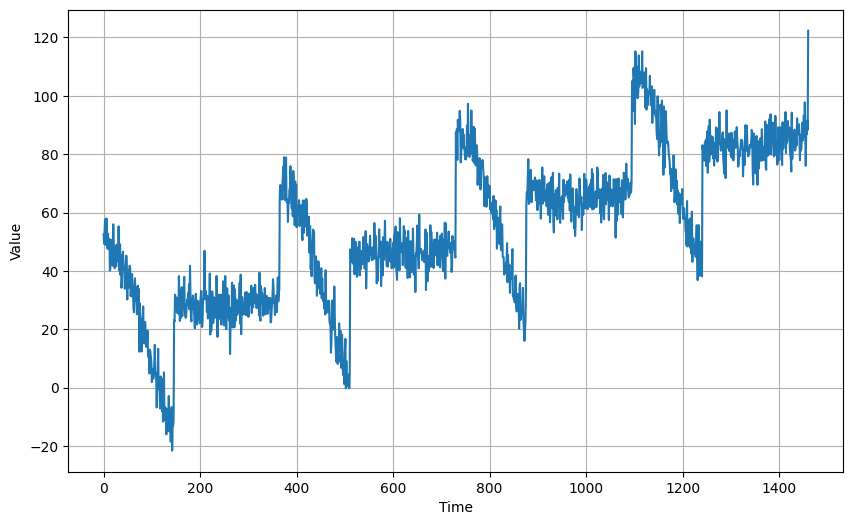

In [ ]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series, xlabel='Time', ylabel='Value')

## Split the Dataset

In [ ]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

## Prepare Features and Labels

As mentioned in the lectures, you can experiment with different batch sizing here and see how it affects your results.

In [ ]:
# Parameters
window_size = 20
batch_size = 16
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to average
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## Build the Model

Here is the model architecture you will be using. It is very similar to the last RNN you built but with the [Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) layer at the input. One important [argument](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D#args) here is the `padding`. For time series data, it is good practice to not let computations for a particular time step to be affected by values into the future. Here is one way of looking at it:

* Let's say you have a small time series window with these values: `[1, 2, 3, 4, 5]`. This means the value `1` is at `t=0`, `2` is at `t=1`, etc.
* If you have a 1D kernel of size `3`, then the first convolution will be for the values at `[1, 2, 3]` which are values for `t=0` to `t=2`.
* When you pass this to the first timestep of the `LSTM` after the convolution, it means that the value at `t=0` of the LSTM depends on `t=1` and `t=2` which are values into the future.
* For time series data, you want computations to only rely on current and previous time steps.
* One way to do that is to pad the array depending on the kernel size and stride. For a kernel size of 3 and stride of 1, the window can be padded as such: `[0, 0, 1, 2, 3, 4, 5]`. `1` is still at `t=0` and two zeroes are prepended to simulate values in the past.
* This way, the first stride will be at `[0, 0, 1]` and this does not contain any future values when it is passed on to subsequent layers.

The `Conv1D` layer does this kind of padding by setting `padding=causal` and you'll see that below.

Parameter strides menentukan ukuran langkah yang digunakan ketika kernel konvolusi bergerak melintasi input. Nilai strides=1 artinya langkahnya satu per satu, kernel akan bergerak sejauh satu unit pada setiap iterasi.

Parameter padding="causal" menentukan tipe padding yang digunakan pada input. Padding "causal" menghasilkan output dengan ukuran yang sama dengan input, sehingga output pada setiap langkah hanya bergantung pada nilai input pada langkah sebelumnya. Padding ini biasa digunakan pada model RNN untuk menjaga urutan waktu input.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 20, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 66,369
Trainable params: 66,369
Non-trainable params: 0
_________________________________________________________________


## Tune the Learning Rate

In the previous labs, you are using different models for tuning and training. That is a valid approach but you can also use the same model for both. Before tuning, you can use the [`get_weights()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#get_weights) method so you can reset it later.

In [ ]:
# Get initial weights
init_weights = model.get_weights()

After that, you can tune the model as usual.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
62/62 [==============================] - 14s 13ms/step - loss: 144.8929 - lr: 1.0000e-08
Epoch 2/100
62/62 [==============================] - 0s 6ms/step - loss: 28.2629 - lr: 1.1220e-08
Epoch 3/100
62/62 [==============================] - 0s 6ms/step - loss: 9.3382 - lr: 1.2589e-08
Epoch 4/100
62/62 [==============================] - 0s 6ms/step - loss: 8.1554 - lr: 1.4125e-08
Epoch 5/100
62/62 [==============================] - 0s 6ms/step - loss: 7.8836 - lr: 1.5849e-08
Epoch 6/100
62/62 [==============================] - 1s 9ms/step - loss: 7.7830 - lr: 1.7783e-08
Epoch 7/100
62/62 [==============================] - 1s 9ms/step - loss: 7.5614 - lr: 1.9953e-08
Epoch 8/100
62/62 [==============================] - 0s 6ms/step - loss: 7.4102 - lr: 2.2387e-08
Epoch 9/100
62/62 [==============================] - 0s 6ms/step - loss: 7.3110 - lr: 2.5119e-08
Epoch 10/100
62/62 [==============================] - 0s 6ms/step - loss: 7.1892 - lr: 2.8184e-08
Epoch 11/100
62/62 [====

(1e-08, 0.001, 0.0, 50.0)

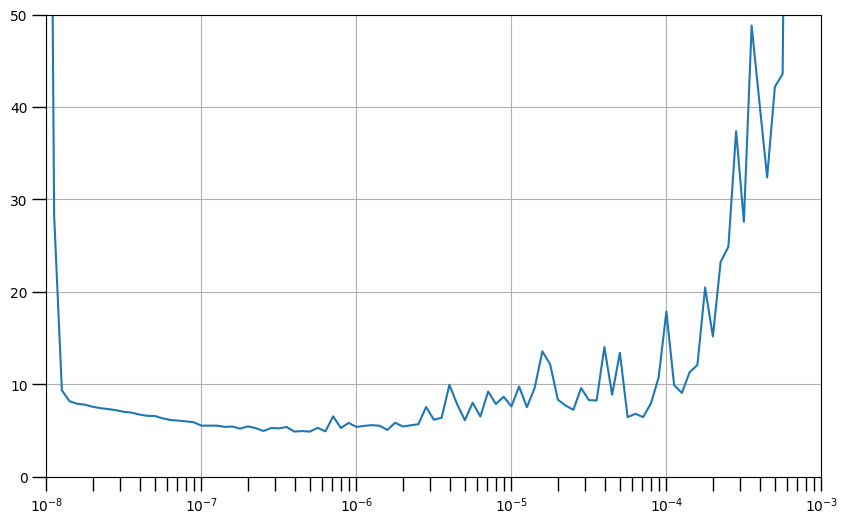

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

## Train the Model

To reset the weights, you can simply call the [`set_weights()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#set_weights) and pass in the saved weights from earlier.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

Then you can set the training parameters and start training.

In [ ]:
# Set the learning rate
learning_rate = 1e-7

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
# Train the model
history = model.fit(train_set,epochs=500)

Epoch 1/500
62/62 [==============================] - 4s 7ms/step - loss: 46.2339 - mae: 46.7281
Epoch 2/500
62/62 [==============================] - 0s 6ms/step - loss: 7.5268 - mae: 8.0091
Epoch 3/500
62/62 [==============================] - 0s 6ms/step - loss: 6.9794 - mae: 7.4582
Epoch 4/500
62/62 [==============================] - 0s 6ms/step - loss: 6.5595 - mae: 7.0400
Epoch 5/500
62/62 [==============================] - 0s 6ms/step - loss: 6.3700 - mae: 6.8527
Epoch 6/500
62/62 [==============================] - 0s 6ms/step - loss: 5.9892 - mae: 6.4707
Epoch 7/500
62/62 [==============================] - 0s 6ms/step - loss: 5.8864 - mae: 6.3661
Epoch 8/500
62/62 [==============================] - 1s 6ms/step - loss: 5.6797 - mae: 6.1591
Epoch 9/500
62/62 [==============================] - 0s 6ms/step - loss: 5.4663 - mae: 5.9442
Epoch 10/500
62/62 [==============================] - 0s 6ms/step - loss: 5.5771 - mae: 6.0567
Epoch 11/500
62/62 [==============================] - 0s 

Training can be a bit unstable especially as the weights start to converge so you may want to visualize it to see if it is still trending down. The earlier epochs might dominate the graph so it's also good to zoom in on the later parts of training to properly observe the parameters. The code below visualizes the `mae` and `loss` for all epochs, and also zooms in at the last 80%.

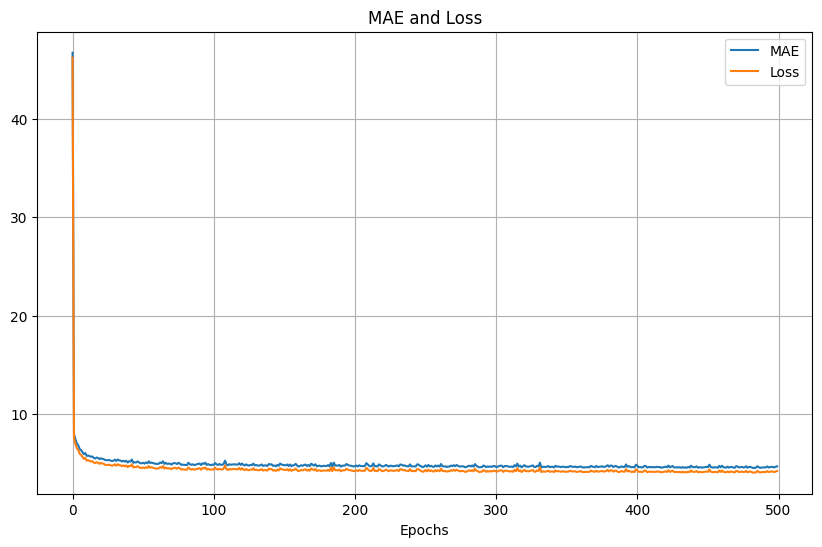

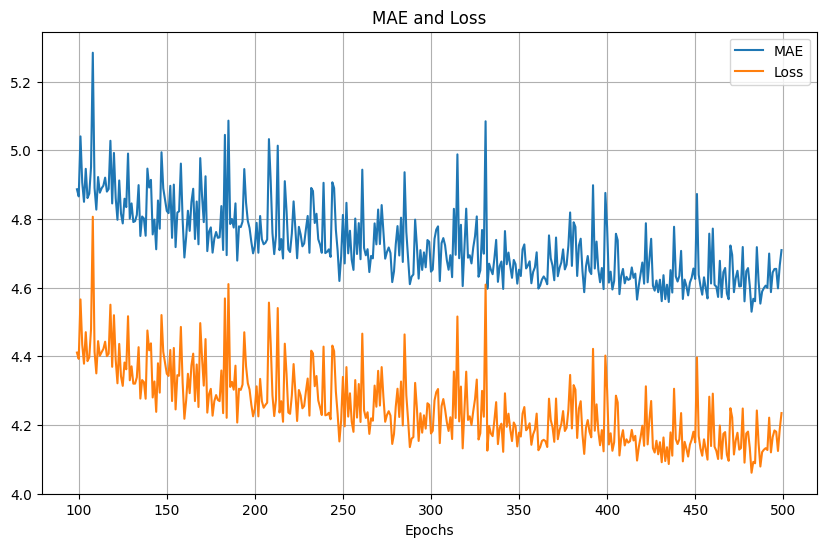

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='Epochs',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='Epochs',
    legend=['MAE', 'Loss']
    )

## Model Prediction

Once training is done, you can generate the model predictions and plot them against the validation set.


In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

29/29 [==============================] - 1s 8ms/step


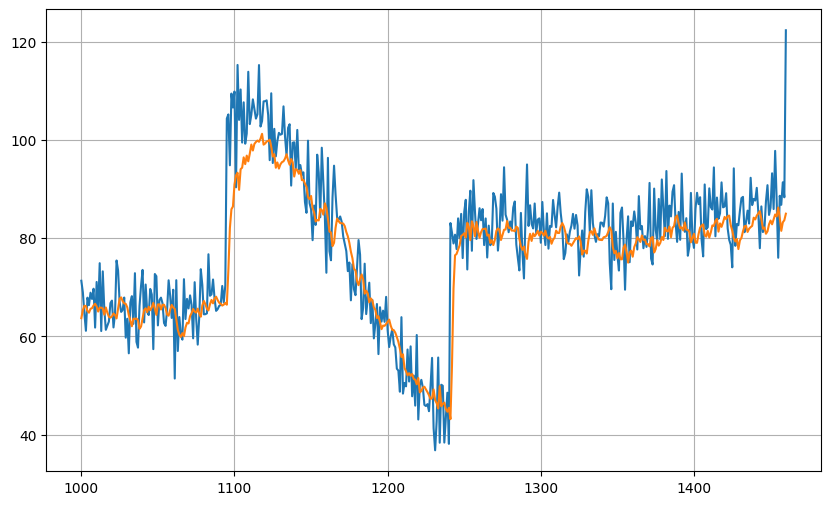

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

You can then compute the metrics as usual.

In [ ]:
## Compute the MAE and MSE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

52.61484
5.301262


## Wrap Up

In this lab, you were able to build and train a CNN-RNN model for forecasting. This concludes the series of notebooks on training with synthetic data. In the next labs, you will be looking at a real world time series dataset, particularly sunspot cycles. See you there!

## Optional - Adding a Callback for Early Stopping

In this optional section, you will add a callback to stop training when a metric is met. You already did this in the first course of this specialization and now would be a good time to review.

First, you need to prepare a validation set that the model can use and monitor. As shown in the previous lab, you can use the `windowed_dataset()` function to prepare this.

In [ ]:
# Generate data windows from the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

You can reset the weights of the model or just continue from where you left off.

In [ ]:
# Uncomment if you want to reset the weights
# model.set_weights(init_weights)

Next, you will define a callback function that is run every end of an epoch. Inside, you will define the condition to stop training. For this lab, you will set it to stop when the `val_mae` is less than `5.2`.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when a certain metric is met

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the validation set MAE
    if(logs.get('val_mae') < 5.2):

      # Stop if threshold is met
      print("\nRequired val MAE is met so cancelling training!")
      self.model.stop_training = True

# Instantiate the class
callbacks = myCallback()

Remember to set an appropriate learning rate here. If you're starting from random weights, you may want to use the same rate you used earlier. If you did not reset the weights however, you can use a lower learning rate so the model can learn better. If all goes well, the training will stop before the set 500 epochs are completed.

In [ ]:
# Set the learning rate
learning_rate = 4e-8

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set, epochs=500, validation_data=val_set, callbacks=[callbacks])

In practice, you normally have a separate test set to evaluate against unseen data. For this exercise however, the dataset is already very small so let's just use the same validation set just to verify that the results are comparable to the one you got earlier.

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The computed metrics here will be slightly different from the one shown in the training output because it has more points to evaluate. Remember that `x_valid` has 461 points that corresponds to `t=1000` to `t=1460`. `val_set` (which is a windowed dataset from `x_valid`), on the other hand, only has 441 points because it cannot generate predictions for `t=1000` to `t=1019` (i.e. windowing will start there).

In [ ]:
## Compute the MAE and MSE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

# Ungraded Lab: Predicting Sunspots with Neural Networks (DNN only)

In the remaining labs for this week, you will move away from synthetic time series and start building models for real world data. In particular, you will train on the [Sunspots](https://www.kaggle.com/datasets/robervalt/sunspots) dataset: a monthly record of sunspot numbers from January 1749 to July 2018. You will first build a deep neural network here composed of dense layers. This will act as your baseline so you can compare it to the next lab where you will use a more complex architecture.

Let's begin!

## Imports

You will use the same imports as before with the addition of the [csv](https://docs.python.org/3/library/csv.html) module. You will need this to parse the CSV file containing the dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

## Utilities

You will only have the `plot_series()` dataset here because you no longer need the synthetic data generation functions.

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      label (string) - tag for the line
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## Download and Preview the Dataset

You can now download the dataset and inspect the contents. The link in class is from Laurence's repo but we also hosted it in the link below.

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv

--2023-05-08 06:34:14--  https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/csv]
Saving to: ‘Sunspots.csv’

Sunspots.csv        100%[===================>]  69.17K  --.-KB/s    in 0.001s  

2023-05-08 06:34:15 (69.0 MB/s) - ‘Sunspots.csv’ saved [70827/70827]



Running the cell below, you'll see that there are only three columns in the dataset:
1. untitled column containing the month number
2. Date which has the format `YYYY-MM-DD`
3. Mean Total Sunspot Number

In [ ]:
# Preview the dataset
!head Sunspots.csv

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
6,1749-07-31,158.0
7,1749-08-31,110.5
8,1749-09-30,126.5


For this lab and the next, you will only need the month number and the mean total sunspot number. You will load those into memory and convert it to arrays that represents a time series.

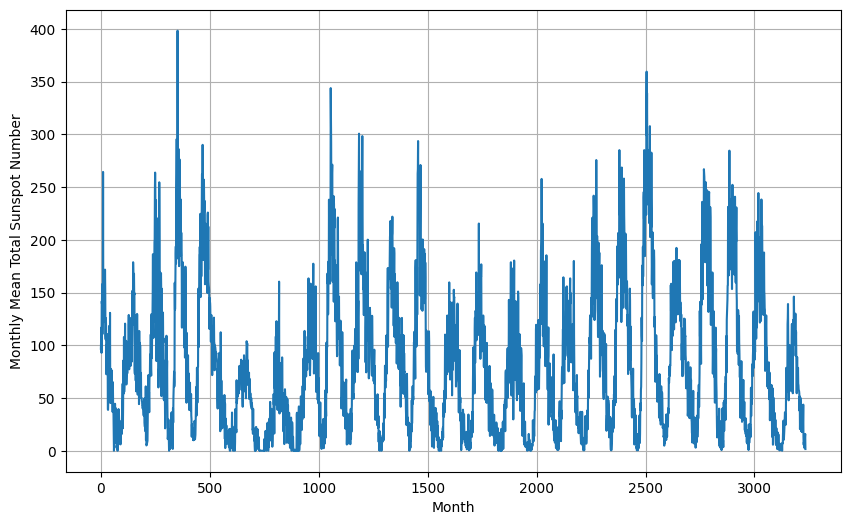

In [ ]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./Sunspots.csv') as csvfile:

  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')

  # Skip the first line
  next(reader)

  # Append row and sunspot number to lists
  for row in reader:
    time_step.append(int(row[0]))
    sunspots.append(float(row[2]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time, series, xlabel='Month', ylabel='Monthly Mean Total Sunspot Number')

## Split the Dataset

Next, you will split the dataset into training and validation sets. There are 3235 points in the dataset and you will use the first 3000 for training.

In [ ]:
# Define the split time
split_time = 3000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
print(f'time_train = {time_train.shape}, x_train = {x_train.shape}, time_valid = {time_valid.shape}, x_valid={x_valid.shape}')

time_train = (3000,), x_train = (3000,), time_valid = (235,), x_valid=(235,)


## Prepare Features and Labels

You can then prepare the dataset windows as before. The window size is set to 30 points (equal to 2.5 years) but feel free to change later on if you want to experiment.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## Build the Model

The model will be 3-layer dense network as shown below.

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


## Tune the Learning Rate

You can pick a learning rate by running the same learning rate scheduler code from previous labs.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
93/93 [==============================] - 2s 12ms/step - loss: 139.4682 - lr: 1.0000e-08
Epoch 2/100
93/93 [==============================] - 1s 4ms/step - loss: 136.5295 - lr: 1.1220e-08
Epoch 3/100
93/93 [==============================] - 1s 4ms/step - loss: 133.2191 - lr: 1.2589e-08
Epoch 4/100
93/93 [==============================] - 1s 4ms/step - loss: 129.5148 - lr: 1.4125e-08
Epoch 5/100
93/93 [==============================] - 1s 4ms/step - loss: 125.3789 - lr: 1.5849e-08
Epoch 6/100
93/93 [==============================] - 1s 4ms/step - loss: 120.7580 - lr: 1.7783e-08
Epoch 7/100
93/93 [==============================] - 1s 4ms/step - loss: 115.5932 - lr: 1.9953e-08
Epoch 8/100
93/93 [==============================] - 1s 4ms/step - loss: 109.8554 - lr: 2.2387e-08
Epoch 9/100
93/93 [==============================] - 1s 4ms/step - loss: 103.4553 - lr: 2.5119e-08
Epoch 10/100
93/93 [==============================] - 1s 4ms/step - loss: 96.3695 - lr: 2.8184e-08
Epoch 11/

(1e-08, 0.001, 0.0, 100.0)

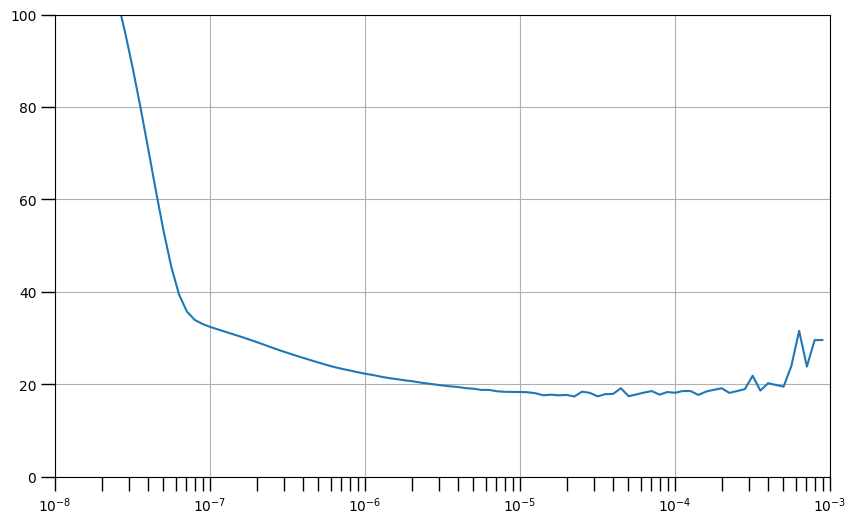

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

## Train the Model

Once you've picked a learning rate, you can rebuild the model and start training.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Set the learning rate
learning_rate = 2e-5

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
93/93 [==============================] - 2s 9ms/step - loss: 27.2250 - mae: 27.7179
Epoch 2/100
93/93 [==============================] - 1s 4ms/step - loss: 20.4087 - mae: 20.9028
Epoch 3/100
93/93 [==============================] - 1s 4ms/step - loss: 19.3822 - mae: 19.8756
Epoch 4/100
93/93 [==============================] - 1s 4ms/step - loss: 18.8800 - mae: 19.3723
Epoch 5/100
93/93 [==============================] - 1s 4ms/step - loss: 18.7297 - mae: 19.2223
Epoch 6/100
93/93 [==============================] - 1s 5ms/step - loss: 18.2723 - mae: 18.7650
Epoch 7/100
93/93 [==============================] - 1s 4ms/step - loss: 18.2755 - mae: 18.7684
Epoch 8/100
93/93 [==============================] - 1s 4ms/step - loss: 18.5571 - mae: 19.0513
Epoch 9/100
93/93 [==============================] - 1s 5ms/step - loss: 17.8570 - mae: 18.3498
Epoch 10/100
93/93 [==============================] - 1s 4ms/step - loss: 18.0396 - mae: 18.5326
Epoch 11/100
93/93 [===================

## Model Prediction

Now see if the model generates good results. If you used the default parameters of this notebook, you should see the predictions follow the shape of the ground truth with an MAE of around 15.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

2970
(264,)
time_valid = (235,), x_valid=(235,)
8/8 [==============================] - 0s 20ms/step


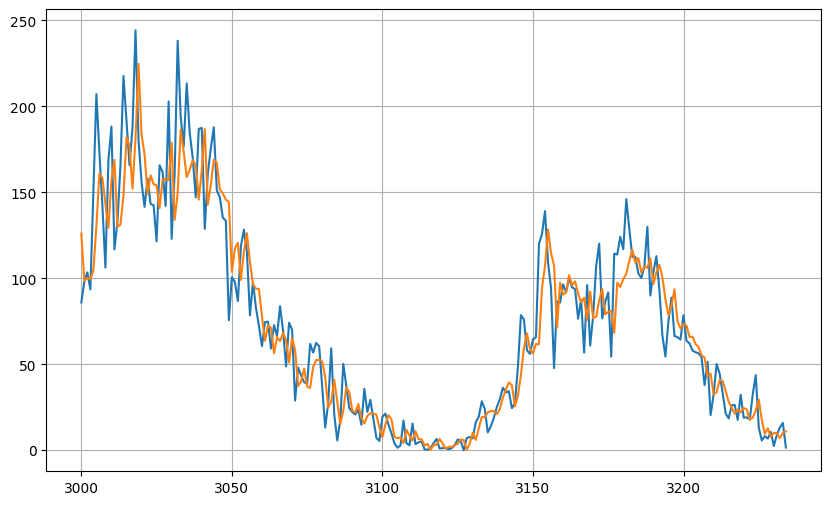

In [ ]:
# Reduce the original series
# forecast_series = series[split_time:]
forecast_series = series[split_time-window_size:-1]
print(split_time-window_size)
print(forecast_series.shape)
print(f'time_valid = {time_valid.shape}, x_valid={x_valid.shape}')
# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

14.9385195


## Wrap Up

In this lab, you built a relatively simple DNN to forecast sunspot numbers for a given month. We encourage you to tweak the parameters or train longer and see the best results you can get. In the next lab, you will build a more complex model and you evaluate if the added complexity translates to better or worse results.

# Ungraded Lab: Predicting Sunspots with Neural Networks

At this point in the course, you should be able to explore different network architectures for forecasting. In the previous weeks, you've used DNNs, RNNs, and CNNs to build these different models. In the final practice lab for this course, you'll try one more configuration and that is a combination of all these types of networks: the data windows will pass through a convolution, followed by stacked LSTMs, followed by stacked dense layers. See if this improves results or you can just opt for simpler models.

## Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

## Utilities

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## Download and Preview the Dataset

In [ ]:
# Download the Dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv

--2023-05-08 07:03:53--  https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/csv]
Saving to: ‘Sunspots.csv’

Sunspots.csv        100%[===================>]  69.17K   432KB/s    in 0.2s    

2023-05-08 07:03:53 (432 KB/s) - ‘Sunspots.csv’ saved [70827/70827]



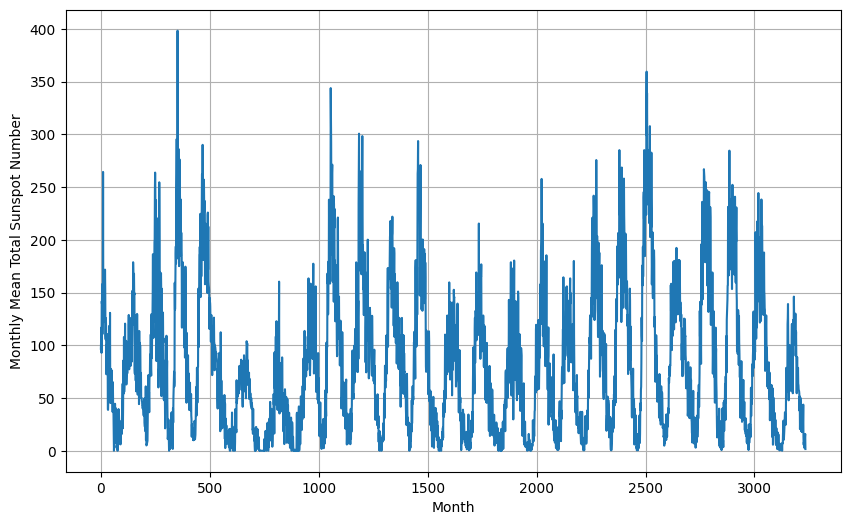

In [ ]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./Sunspots.csv') as csvfile:

  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')

  # Skip the first line
  next(reader)

  # Append row and sunspot number to lists
  for row in reader:
    time_step.append(int(row[0]))
    sunspots.append(float(row[2]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time, series, xlabel='Month', ylabel='Monthly Mean Total Sunspot Number')

## Split the Dataset

In [ ]:
# Define the split time
split_time = 3000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

## Prepare Features and Labels

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

As mentioned in the lectures, if your results don't good, you can try tweaking the parameters here and see if the model will learn better.

In [ ]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

Penentuan parameter window_size dan batch_size dalam time series forecasting didasarkan pada beberapa faktor:

Jumlah data: Jika Anda memiliki jumlah data yang besar, Anda bisa menggunakan window_size yang lebih besar untuk melihat pola yang lebih jelas dalam data Anda. Namun, dengan window_size yang besar, batch size yang besar juga diperlukan untuk memprosesnya.

Ketergantungan waktu: Jika data Anda memiliki ketergantungan waktu yang kuat, window_size yang lebih kecil mungkin diperlukan untuk memperhatikan pola yang berubah seiring waktu.

Waktu pemrosesan: Semakin besar batch_size, semakin banyak memori yang dibutuhkan. Oleh karena itu, parameter ini juga harus disesuaikan dengan kebutuhan sistem Anda.

Pada umumnya, window_size yang digunakan berkisar antara 10-100 tergantung pada karakteristik data. Sedangkan untuk batch_size, pada umumnya nilainya berkisar antara 32-256, tergantung pada jumlah data dan kapasitas komputasi yang tersedia. Pengaturan parameter yang tepat akan membantu model mendapatkan informasi yang cukup dan mendapatkan hasil yang lebih akurat.

Tidak ada rumus atau pola tertentu yang pasti dalam menentukan nilai window_size dan batch_size dalam time series forecasting, karena hal tersebut sangat tergantung pada karakteristik data dan tujuan dari pemodelan yang ingin dicapai. Namun, terdapat beberapa pertimbangan umum yang dapat membantu menentukan nilai yang baik:

Window_size: Untuk memilih nilai window_size, pertimbangkan lamanya periode yang ingin diprediksi dan juga seberapa jauh masa lalu yang perlu dianalisis untuk memprediksi masa depan tersebut. Nilai window_size sebaiknya tidak terlalu pendek sehingga dapat menangkap tren dan pola yang lebih kompleks pada data, namun juga tidak terlalu panjang sehingga dapat menyebabkan kehilangan informasi penting atau overfitting.

Batch_size: Pemilihan batch_size juga dapat bervariasi tergantung pada tujuan dari pemodelan dan karakteristik data. Umumnya, batch_size yang lebih besar akan mempercepat waktu training model namun bisa memerlukan lebih banyak memori dan mungkin menghasilkan hasil yang lebih variatif. Sedangkan, batch_size yang lebih kecil memerlukan lebih banyak waktu training dan dapat menyebabkan konvergensi model yang lebih lambat, namun bisa menghasilkan hasil yang lebih stabil dan konsisten. Jumlah data dan kompleksitas model juga dapat memengaruhi pemilihan batch_size.

Oleh karena itu, disarankan untuk melakukan beberapa eksperimen dengan nilai yang berbeda untuk menemukan kombinasi window_size dan batch_size yang optimal untuk data dan tujuan pemodelan yang spesifik.

## Build the Model

You've seen these layers before and here is how it's looks like when combined.

In [ ]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 30, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

## Tune the Learning Rate

As usual, you will want to pick an optimal learning rate.

In [ ]:
# Get initial weights
init_weights = model.get_weights()

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
93/93 [==============================] - 15s 13ms/step - loss: 47.3695 - lr: 1.0000e-08
Epoch 2/100
93/93 [==============================] - 1s 9ms/step - loss: 41.7521 - lr: 1.1220e-08
Epoch 3/100
93/93 [==============================] - 1s 9ms/step - loss: 38.0567 - lr: 1.2589e-08
Epoch 4/100
93/93 [==============================] - 1s 9ms/step - loss: 35.8870 - lr: 1.4125e-08
Epoch 5/100
93/93 [==============================] - 1s 9ms/step - loss: 34.4384 - lr: 1.5849e-08
Epoch 6/100
93/93 [==============================] - 1s 9ms/step - loss: 33.3710 - lr: 1.7783e-08
Epoch 7/100
93/93 [==============================] - 1s 9ms/step - loss: 32.3744 - lr: 1.9953e-08
Epoch 8/100
93/93 [==============================] - 1s 9ms/step - loss: 31.4166 - lr: 2.2387e-08
Epoch 9/100
93/93 [==============================] - 1s 12ms/step - loss: 30.4970 - lr: 2.5119e-08
Epoch 10/100
93/93 [==============================] - 1s 13ms/step - loss: 29.5460 - lr: 2.8184e-08
Epoch 11/100
93

(1e-08, 0.001, 0.0, 100.0)

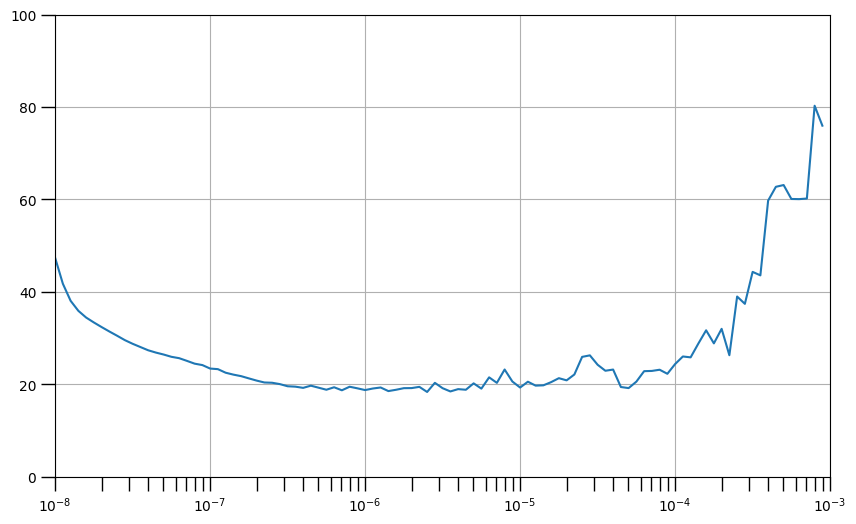

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

## Train the Model

Now you can proceed to reset and train the model. It is set for 100 epochs in the cell below but feel free to increase it if you want. Laurence got his results in the lectures after 500.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [ ]:
# Set the learning rate
learning_rate = 8e-7

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
93/93 [==============================] - 5s 10ms/step - loss: 30.2117 - mae: 30.7062
Epoch 2/100
93/93 [==============================] - 1s 9ms/step - loss: 21.7198 - mae: 22.2129
Epoch 3/100
93/93 [==============================] - 1s 9ms/step - loss: 20.3426 - mae: 20.8362
Epoch 4/100
93/93 [==============================] - 1s 9ms/step - loss: 19.8438 - mae: 20.3365
Epoch 5/100
93/93 [==============================] - 1s 9ms/step - loss: 19.4073 - mae: 19.8986
Epoch 6/100
93/93 [==============================] - 1s 9ms/step - loss: 19.6815 - mae: 20.1731
Epoch 7/100
93/93 [==============================] - 1s 10ms/step - loss: 18.8121 - mae: 19.3025
Epoch 8/100
93/93 [==============================] - 1s 11ms/step - loss: 18.6955 - mae: 19.1884
Epoch 9/100
93/93 [==============================] - 2s 14ms/step - loss: 18.2116 - mae: 18.7032
Epoch 10/100
93/93 [==============================] - 1s 10ms/step - loss: 18.3870 - mae: 18.8788
Epoch 11/100
93/93 [==============

You can visualize the training and see if the loss and MAE are still trending down.

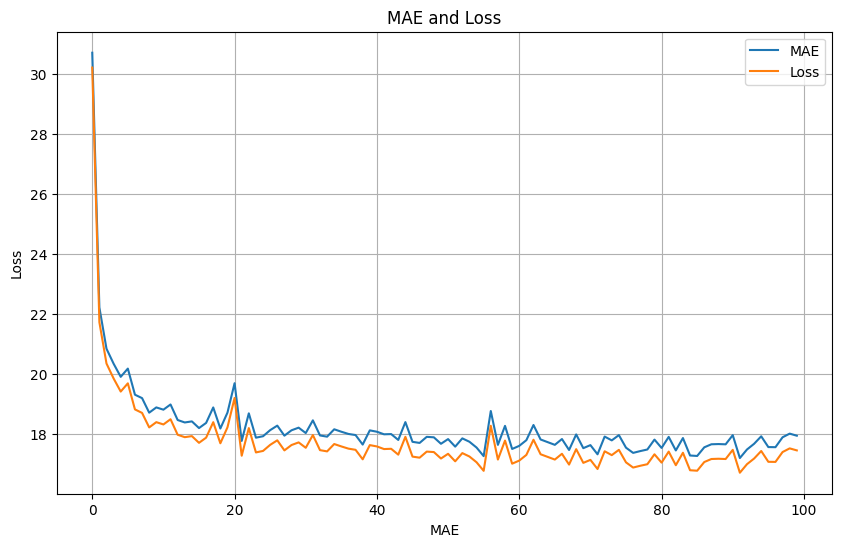

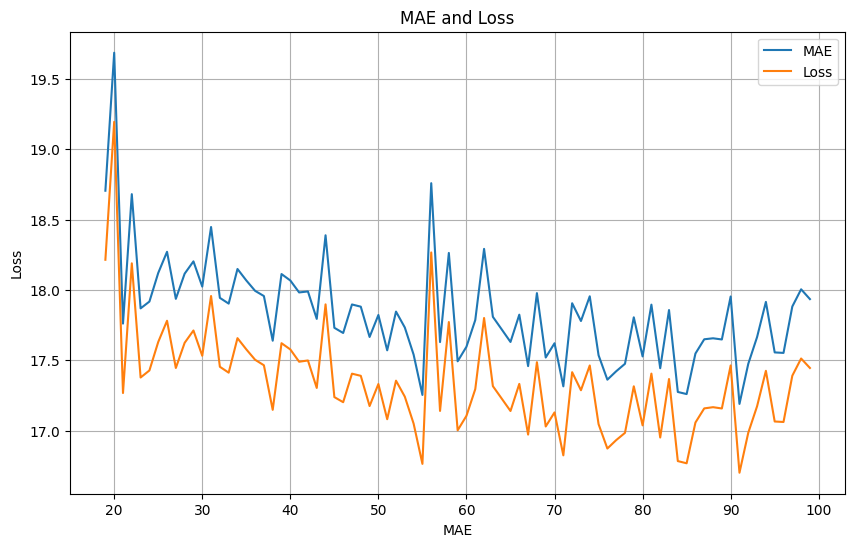

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

## Model Prediction

As before, you can get the predictions for the validation set time range and compute the metrics.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

## Wrap Up

This concludes the final practice lab for this course! You implemented a deep and complex architecture composed of CNNs, RNNs, and DNNs. You'll be using the skills you developed throughout this course to complete the final assignment. Keep it up!

## Optional

In this optional section, you will look at another way to dynamically set the learning rate. As you may have noticed, training for a long time generates less and less changes to the loss and metrics. You can run the cell below to observe that again.

In [ ]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=10)

At some point, the static learning rate you set might no longer be the optimal one when the model has been learning for some time. You may want to decrease it some more to see better improvements. One way to do that is to have your training loop gradually decay the learning rate per epoch. You can pass in a lambda function similar like the one you did for the learning rate scheduler earlier, or use [ExponentialDecay()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay). This is a built in scheduler from the Keras API. This decays the learning rate defined by this function:

```
def decayed_learning_rate(step):
  return initial_learning_rate * decay_rate ^ (step / decay_steps)
```

See how it is used below.

In [ ]:
# Set the initial learning rate
initial_learning_rate=1e-7

# Define the scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=400,
    decay_rate=0.96,
    staircase=True)

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=40)

Epoch 1/40
93/93 [==============================] - 6s 14ms/step - loss: 16.4967 - mae: 16.9860
Epoch 2/40
93/93 [==============================] - 1s 9ms/step - loss: 16.4435 - mae: 16.9335
Epoch 3/40
93/93 [==============================] - 1s 9ms/step - loss: 16.3923 - mae: 16.8819
Epoch 4/40
93/93 [==============================] - 1s 9ms/step - loss: 16.3568 - mae: 16.8461
Epoch 5/40
93/93 [==============================] - 1s 9ms/step - loss: 16.3397 - mae: 16.8281
Epoch 6/40
93/93 [==============================] - 1s 10ms/step - loss: 16.3422 - mae: 16.8317
Epoch 7/40
93/93 [==============================] - 1s 9ms/step - loss: 16.3836 - mae: 16.8734
Epoch 8/40
93/93 [==============================] - 1s 9ms/step - loss: 16.4426 - mae: 16.9320
Epoch 9/40
93/93 [==============================] - 1s 9ms/step - loss: 16.3419 - mae: 16.8307
Epoch 10/40
93/93 [==============================] - 1s 9ms/step - loss: 16.3467 - mae: 16.8377
Epoch 11/40
93/93 [============================

Pada code tersebut, kita membuat sebuah objek 'lr_schedule' yang jadwal penurunan lr dengan menggunakan metode Exponential Decay. Argumen 'initial_learning_rate' menentukan nilai learning rate yang ditentukan diawal. Argumen decay_step digunakan untuk setiap berapa iterasi penurunan lr akan dilakukan, dalam hal ini setiap 400 iterasi. Dan argumen decay_steps untuk menentukan seberapa banyak penurunan akan dilakukan, dalam hal ini lr akan menurun 0.96 setiap kali dilakukan penurunan. Argumen staircase adalah boolean yang menentukan apakah penurunan dilakukan secara terus terusan atau secara bertahap berdasarkan decay_step. Jika staircase bernilai True maka akan dilakukan secara bertahap berdasarkan decay_step, dan sebaliknya setiap langkahnya akan dilakukan penurunan dengan mengalikan lr dengan decay_steps

Now see the results by geting predicitons and computing the metrics.

8/8 [==============================] - 1s 12ms/step


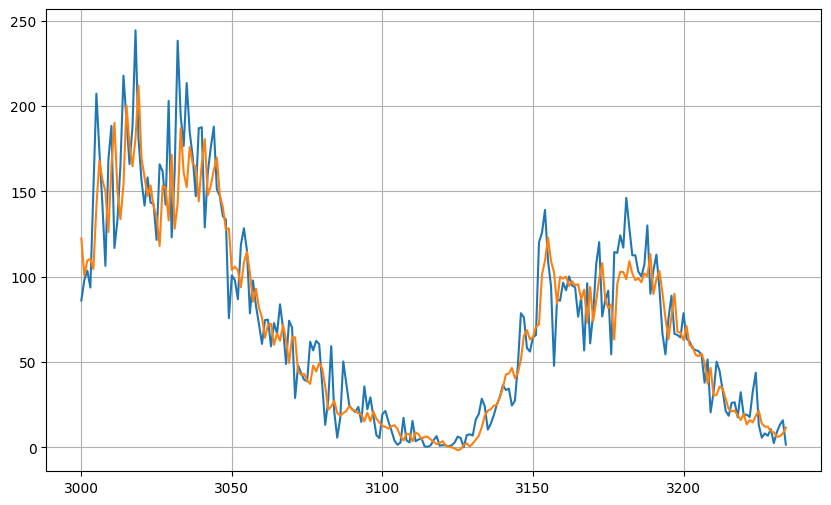

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MAE
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

14.494339

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

print('\u2022 Using TensorFlow Version:', tf.__version__)
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')


• Using TensorFlow Version: 2.12.0


In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)


Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 27.6523
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 22.0579
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 17.6503
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 14.1766
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 11.4376
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 9.2769
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 7.5713
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 6.2238
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 5.1581
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 4.3143
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 3.6452
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 3.1137
Epoch 13/500
1/1 [==============================] - 0

In [ ]:
print(model.predict([10.0]))


import time
import tensorflowjs as tfjs
saved_model_path = "/content/drive/MyDrive/Colab Notebooks/{}.h5".format(int(time.time()))

tfjs.converters.save_keras_model(model, saved_model_path)
print('Saving process is successful')

1/1 [==============================] - 0s 45ms/step
[[18.979393]]
Saving process is successful
